In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
%matplotlib inline 
# matplotlib 그래프 바로 그려라?
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
'''
!pip install plotly==4.4.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
'''

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


'\n!pip install plotly==4.4.1\n!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca\n!chmod +x /usr/local/bin/orca\n!apt-get install xvfb libgtk2.0-0 libgconf-2-4\n'

In [15]:
df_patient = pd.read_csv('PatientInfo.csv')

In [16]:
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [17]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [18]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

###데이터 결측치 확인

In [19]:
df_patient.isna().sum() #isna() => Null이니?

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

###나이(age) -> 20s -> 23 정확하게 변경 -> (현재년도 - 태어난 년도)<br>
1. Nan 데이터를 처리(Nan은 계산 불가) -> 0으로 채운다<br>
2. 나이 계산시, 0보다 큰 값은 (현재년도-태어난 년도)0보다 작으면 다시 Nan 채우기   

In [20]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [21]:
df_patient.isna().sum() #isna() => Null이니?

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [22]:
# 0보다 큰 값은 그대로 사용하고, 0인 값은 Nan으로 변환 -> 나이 계산 시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [23]:
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [24]:
patient = df_patient

###2. 격리해제자(released) 데이터

In [25]:
released = patient[patient.state == 'released']
released.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

격리해제자들의 연령대 분석

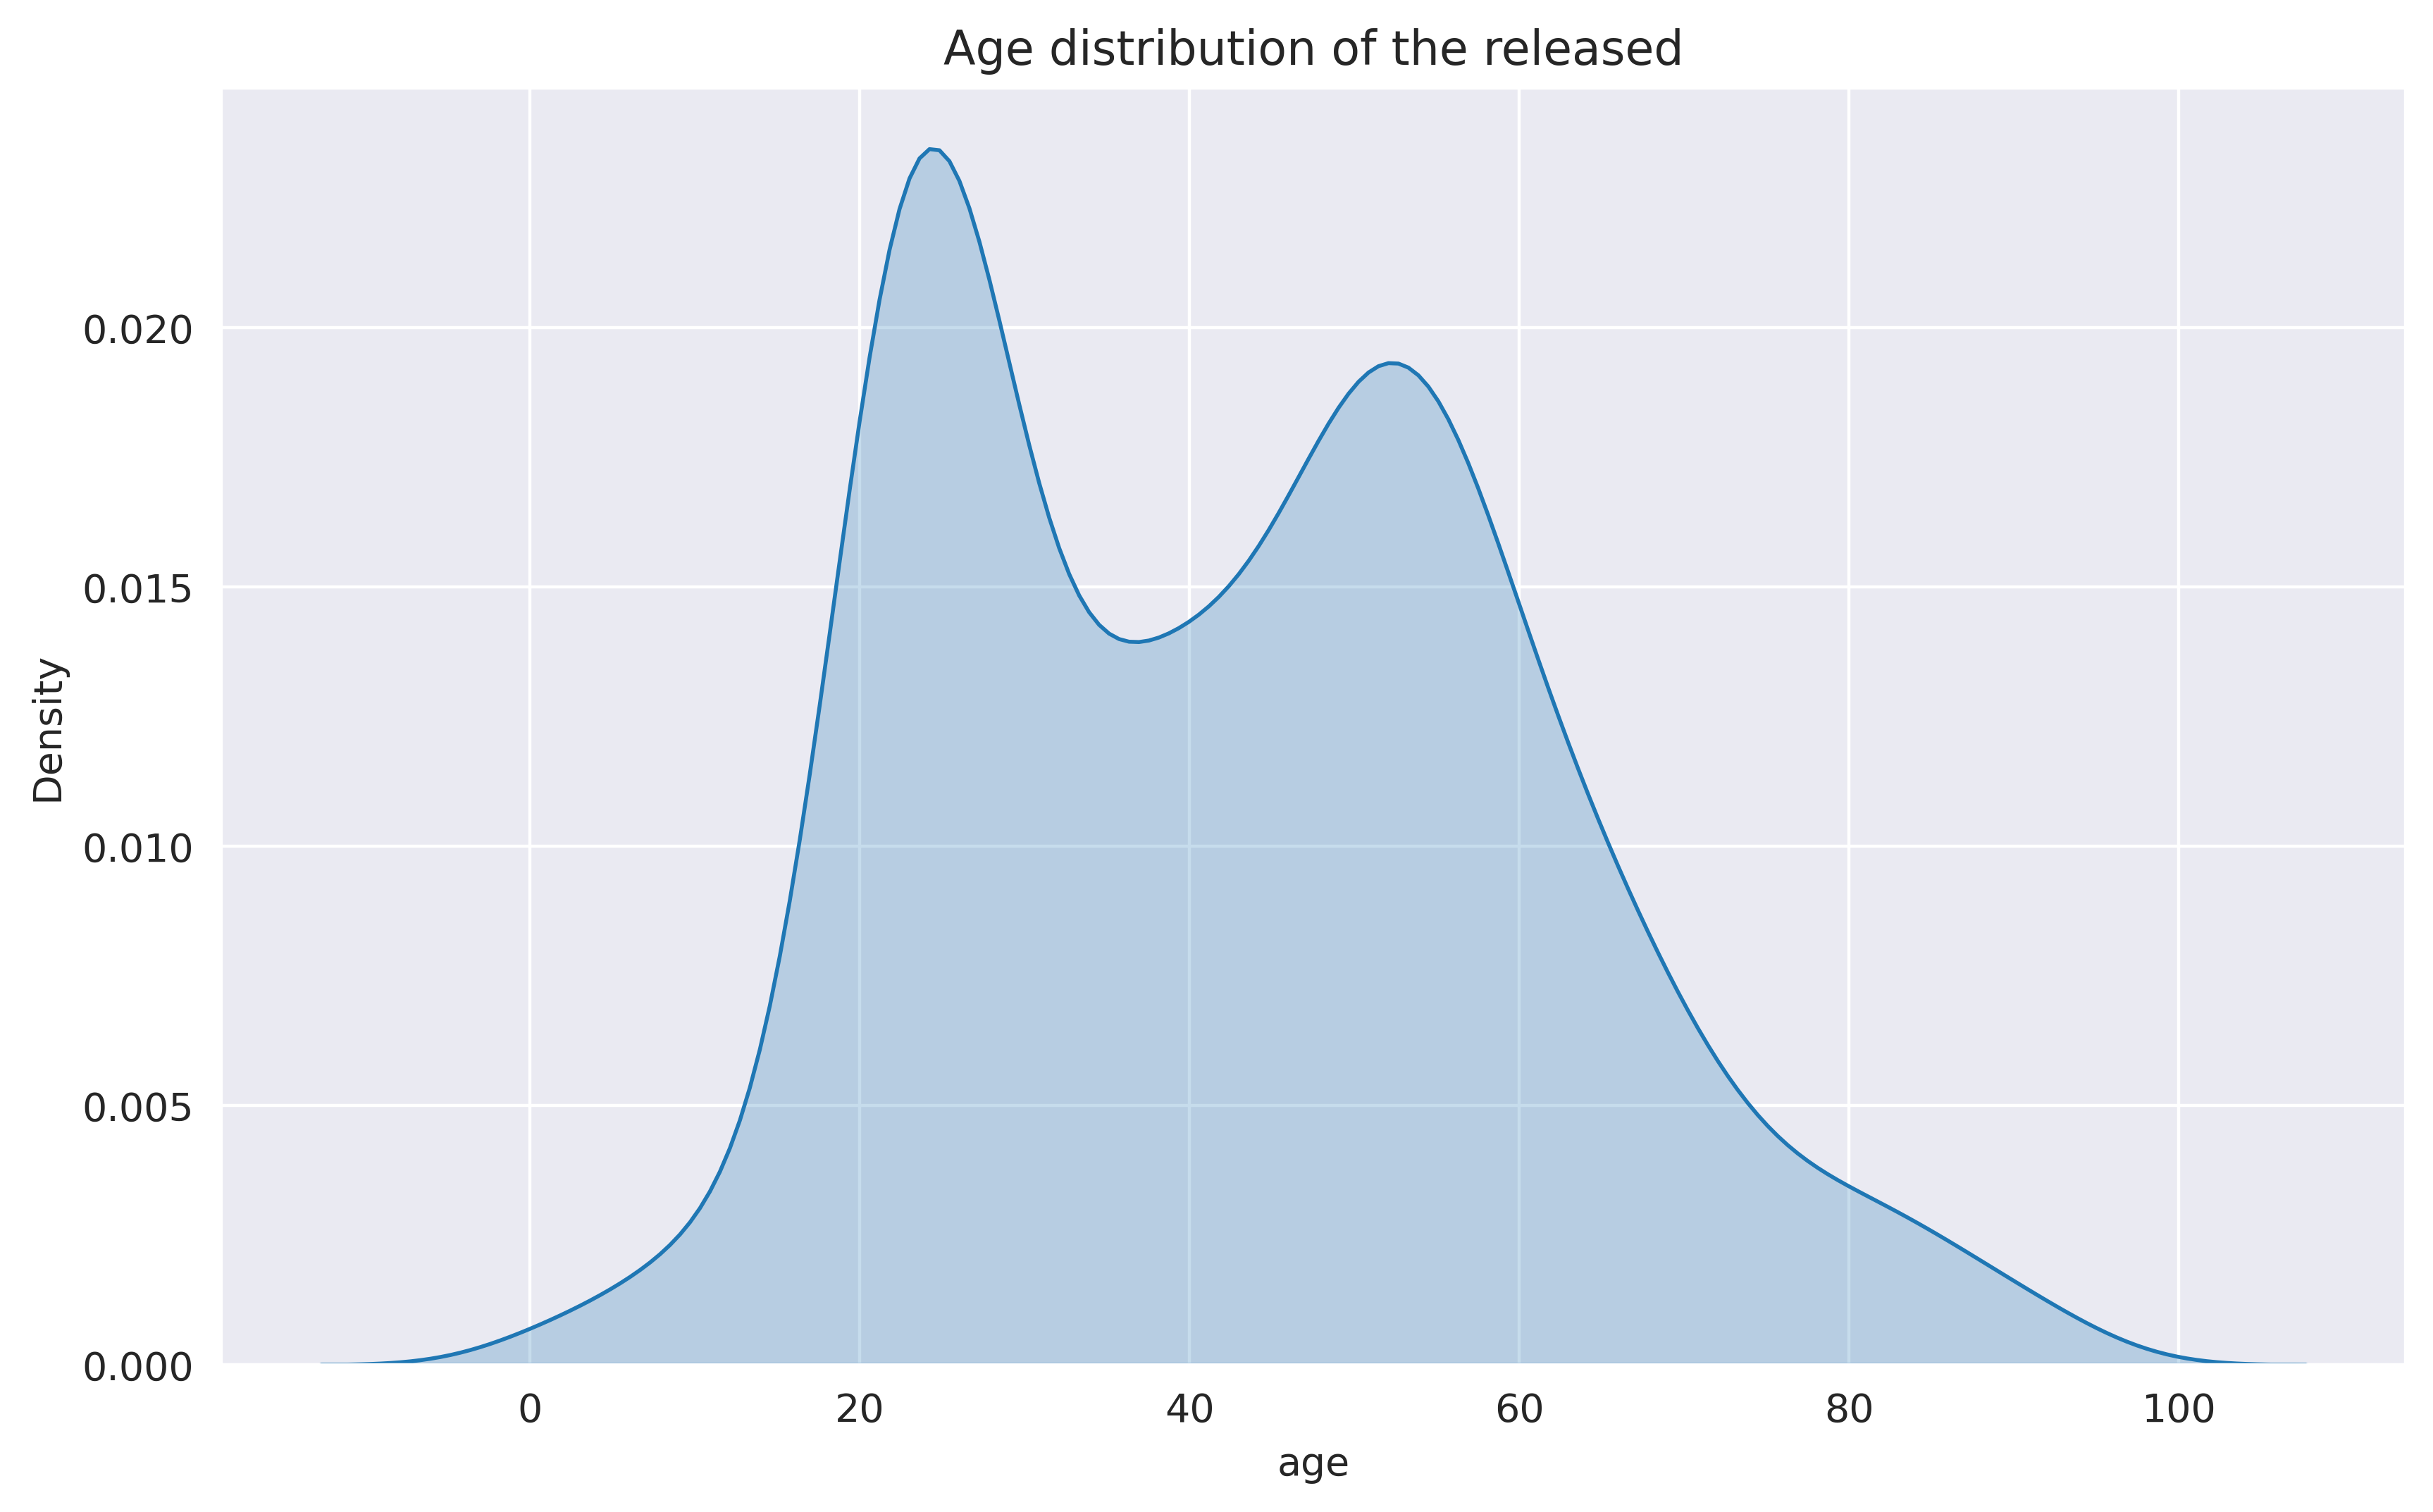

In [26]:
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'],shade=True)

격리된 환자 정보 변수 담기


In [27]:
isolated_state = patient[patient.state=='isolated']
isolated_state.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
14,1000000015,40.0,male,1943.0,77.0,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated
87,1000000088,3790.0,male,1975.0,45.0,Korea,Seoul,Gwangjin-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
101,1000000102,5666.0,female,1971.0,49.0,Korea,Seoul,Yongsan-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
130,1000000131,7401.0,female,1969.0,51.0,Korea,Seoul,Eunpyeong-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,2020-03-07,2020-03-09,NaN,NaN,isolated
132,1000000133,7514.0,female,1977.0,43.0,Korea,Seoul,Gangdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated


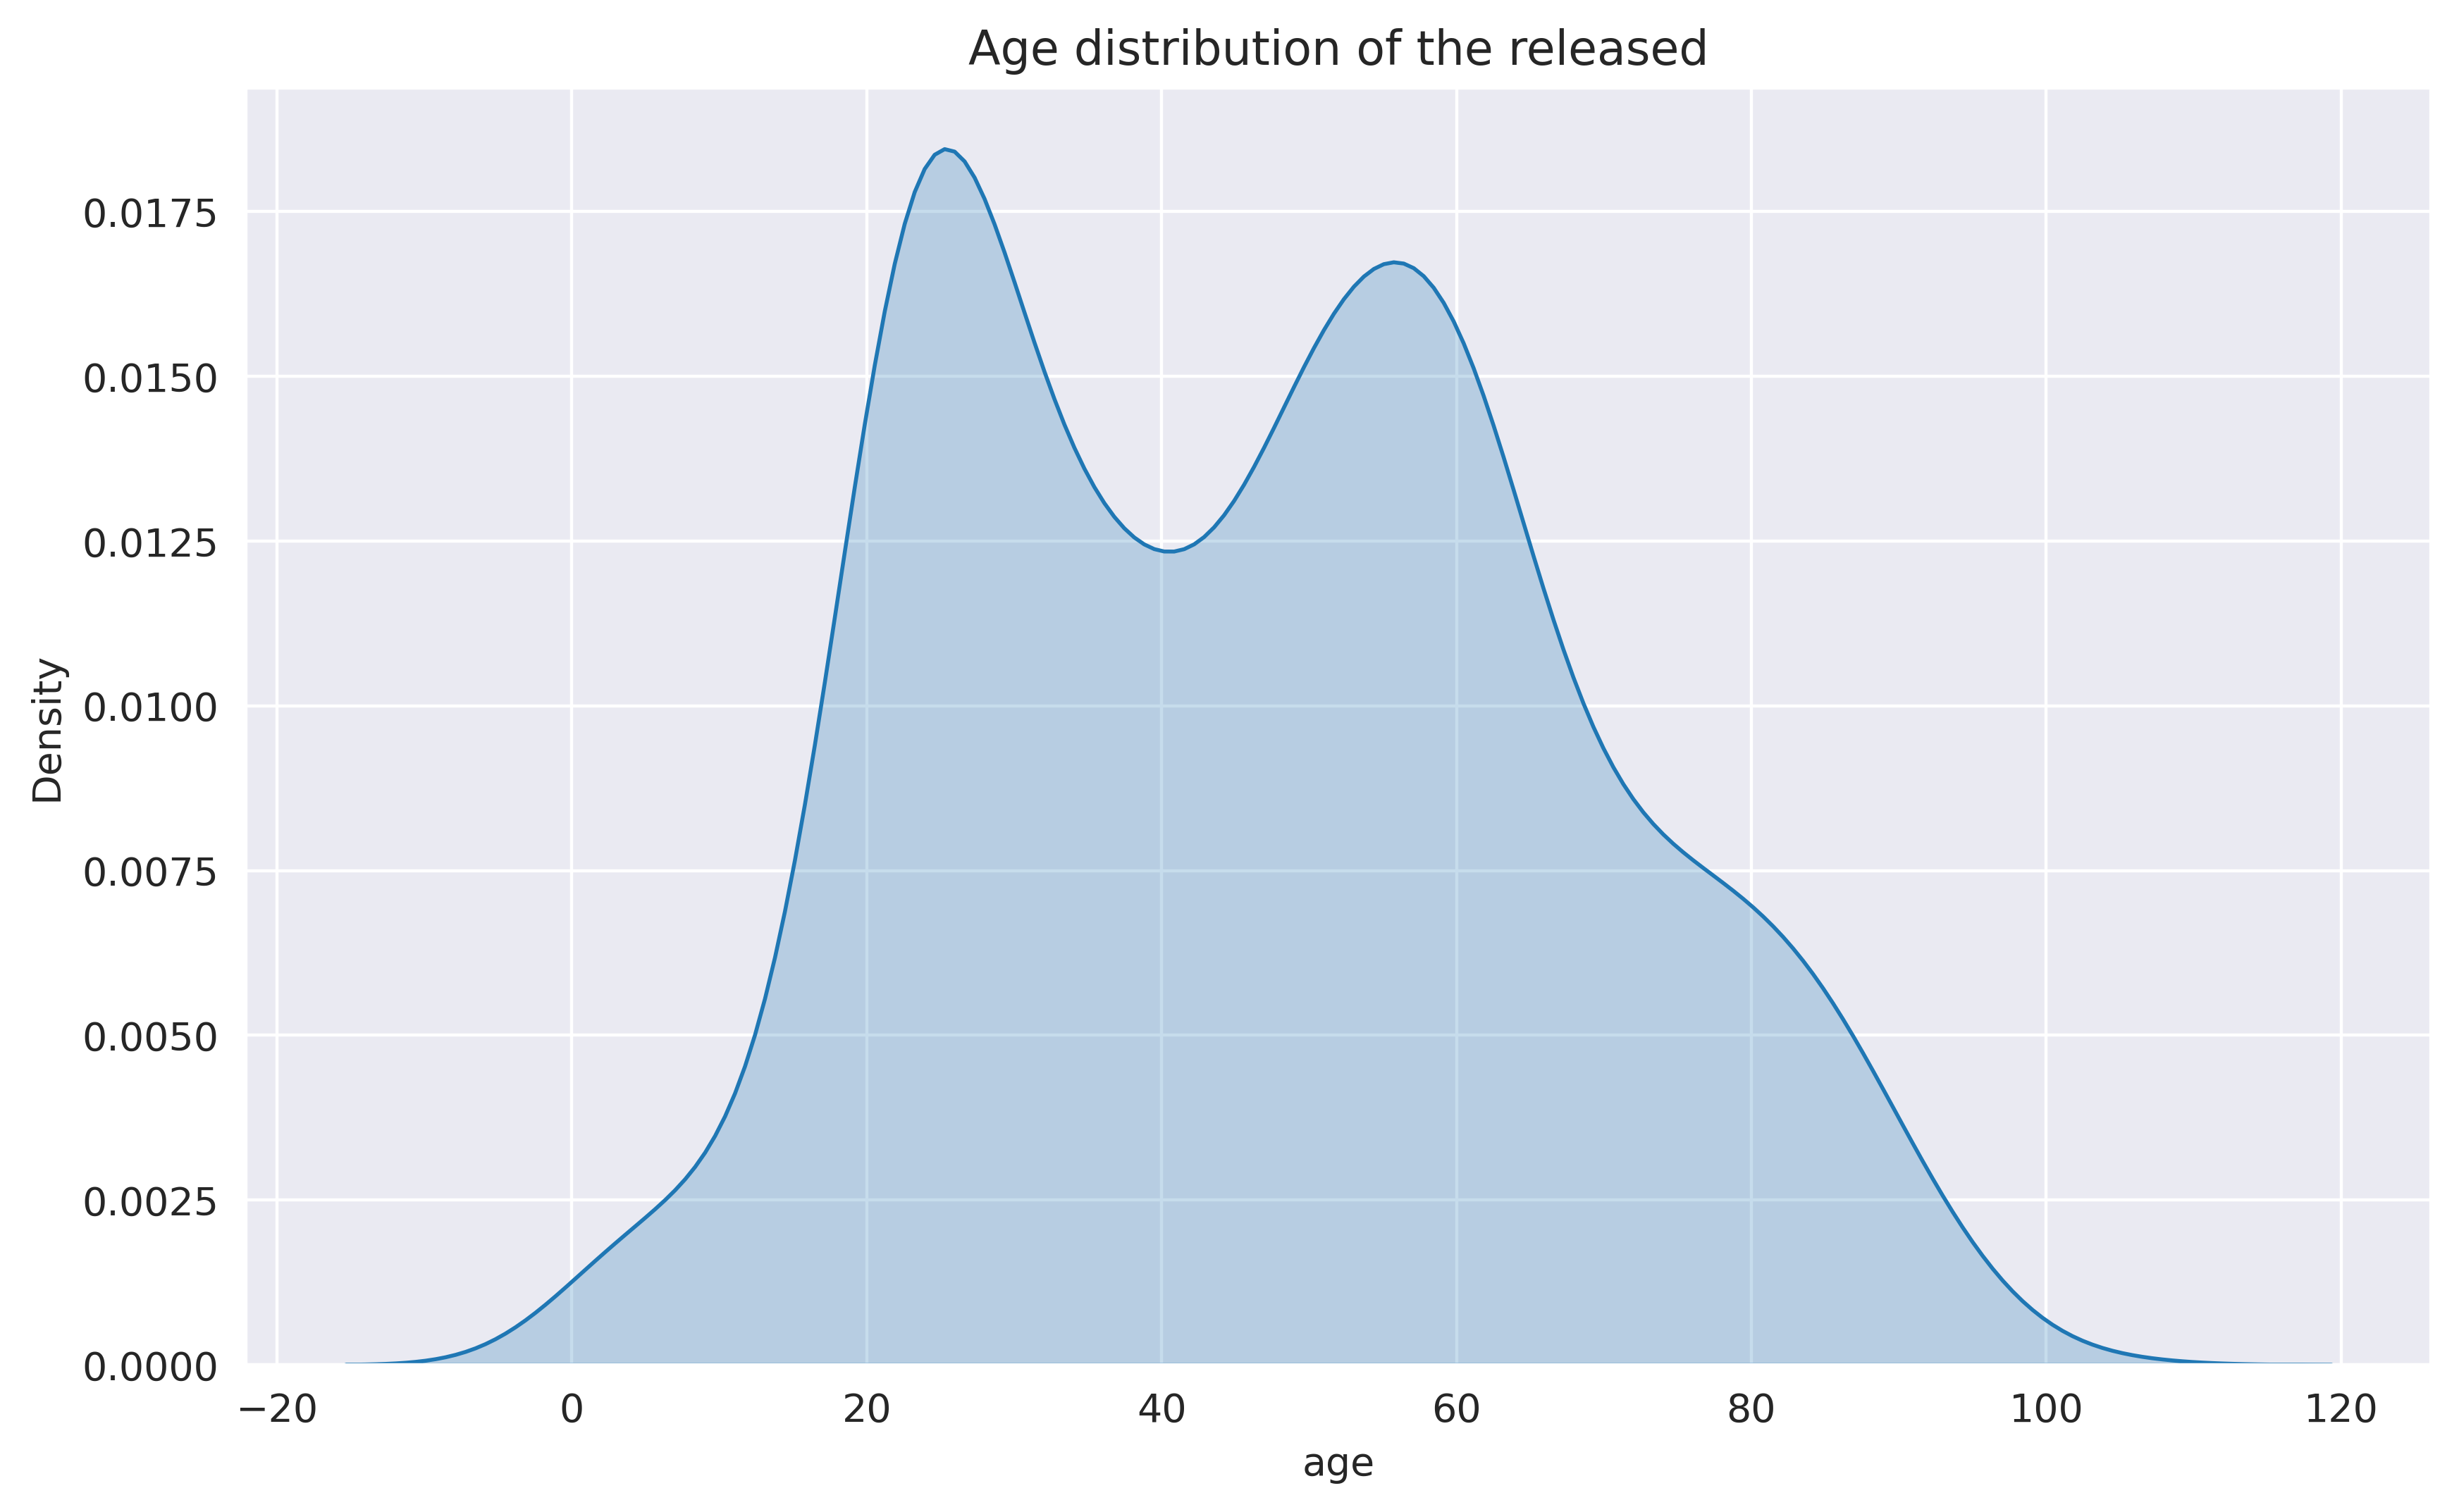

In [28]:
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=isolated_state['age'],shade=True)

In [87]:
#사망자 정보 dead 변수 담기
dead = patient[patient.state=='deceased']
dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,91.0,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,44.0,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,79.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,73.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dead_patient = dead[dead.state=='deceased'&dead.gender==]


plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 200
#plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
#plt.rc('font',family = "NanumBarunGothic")
#plt.title(name+' 지역의 인구 구조')
#df2.T.plot()
plt.show()

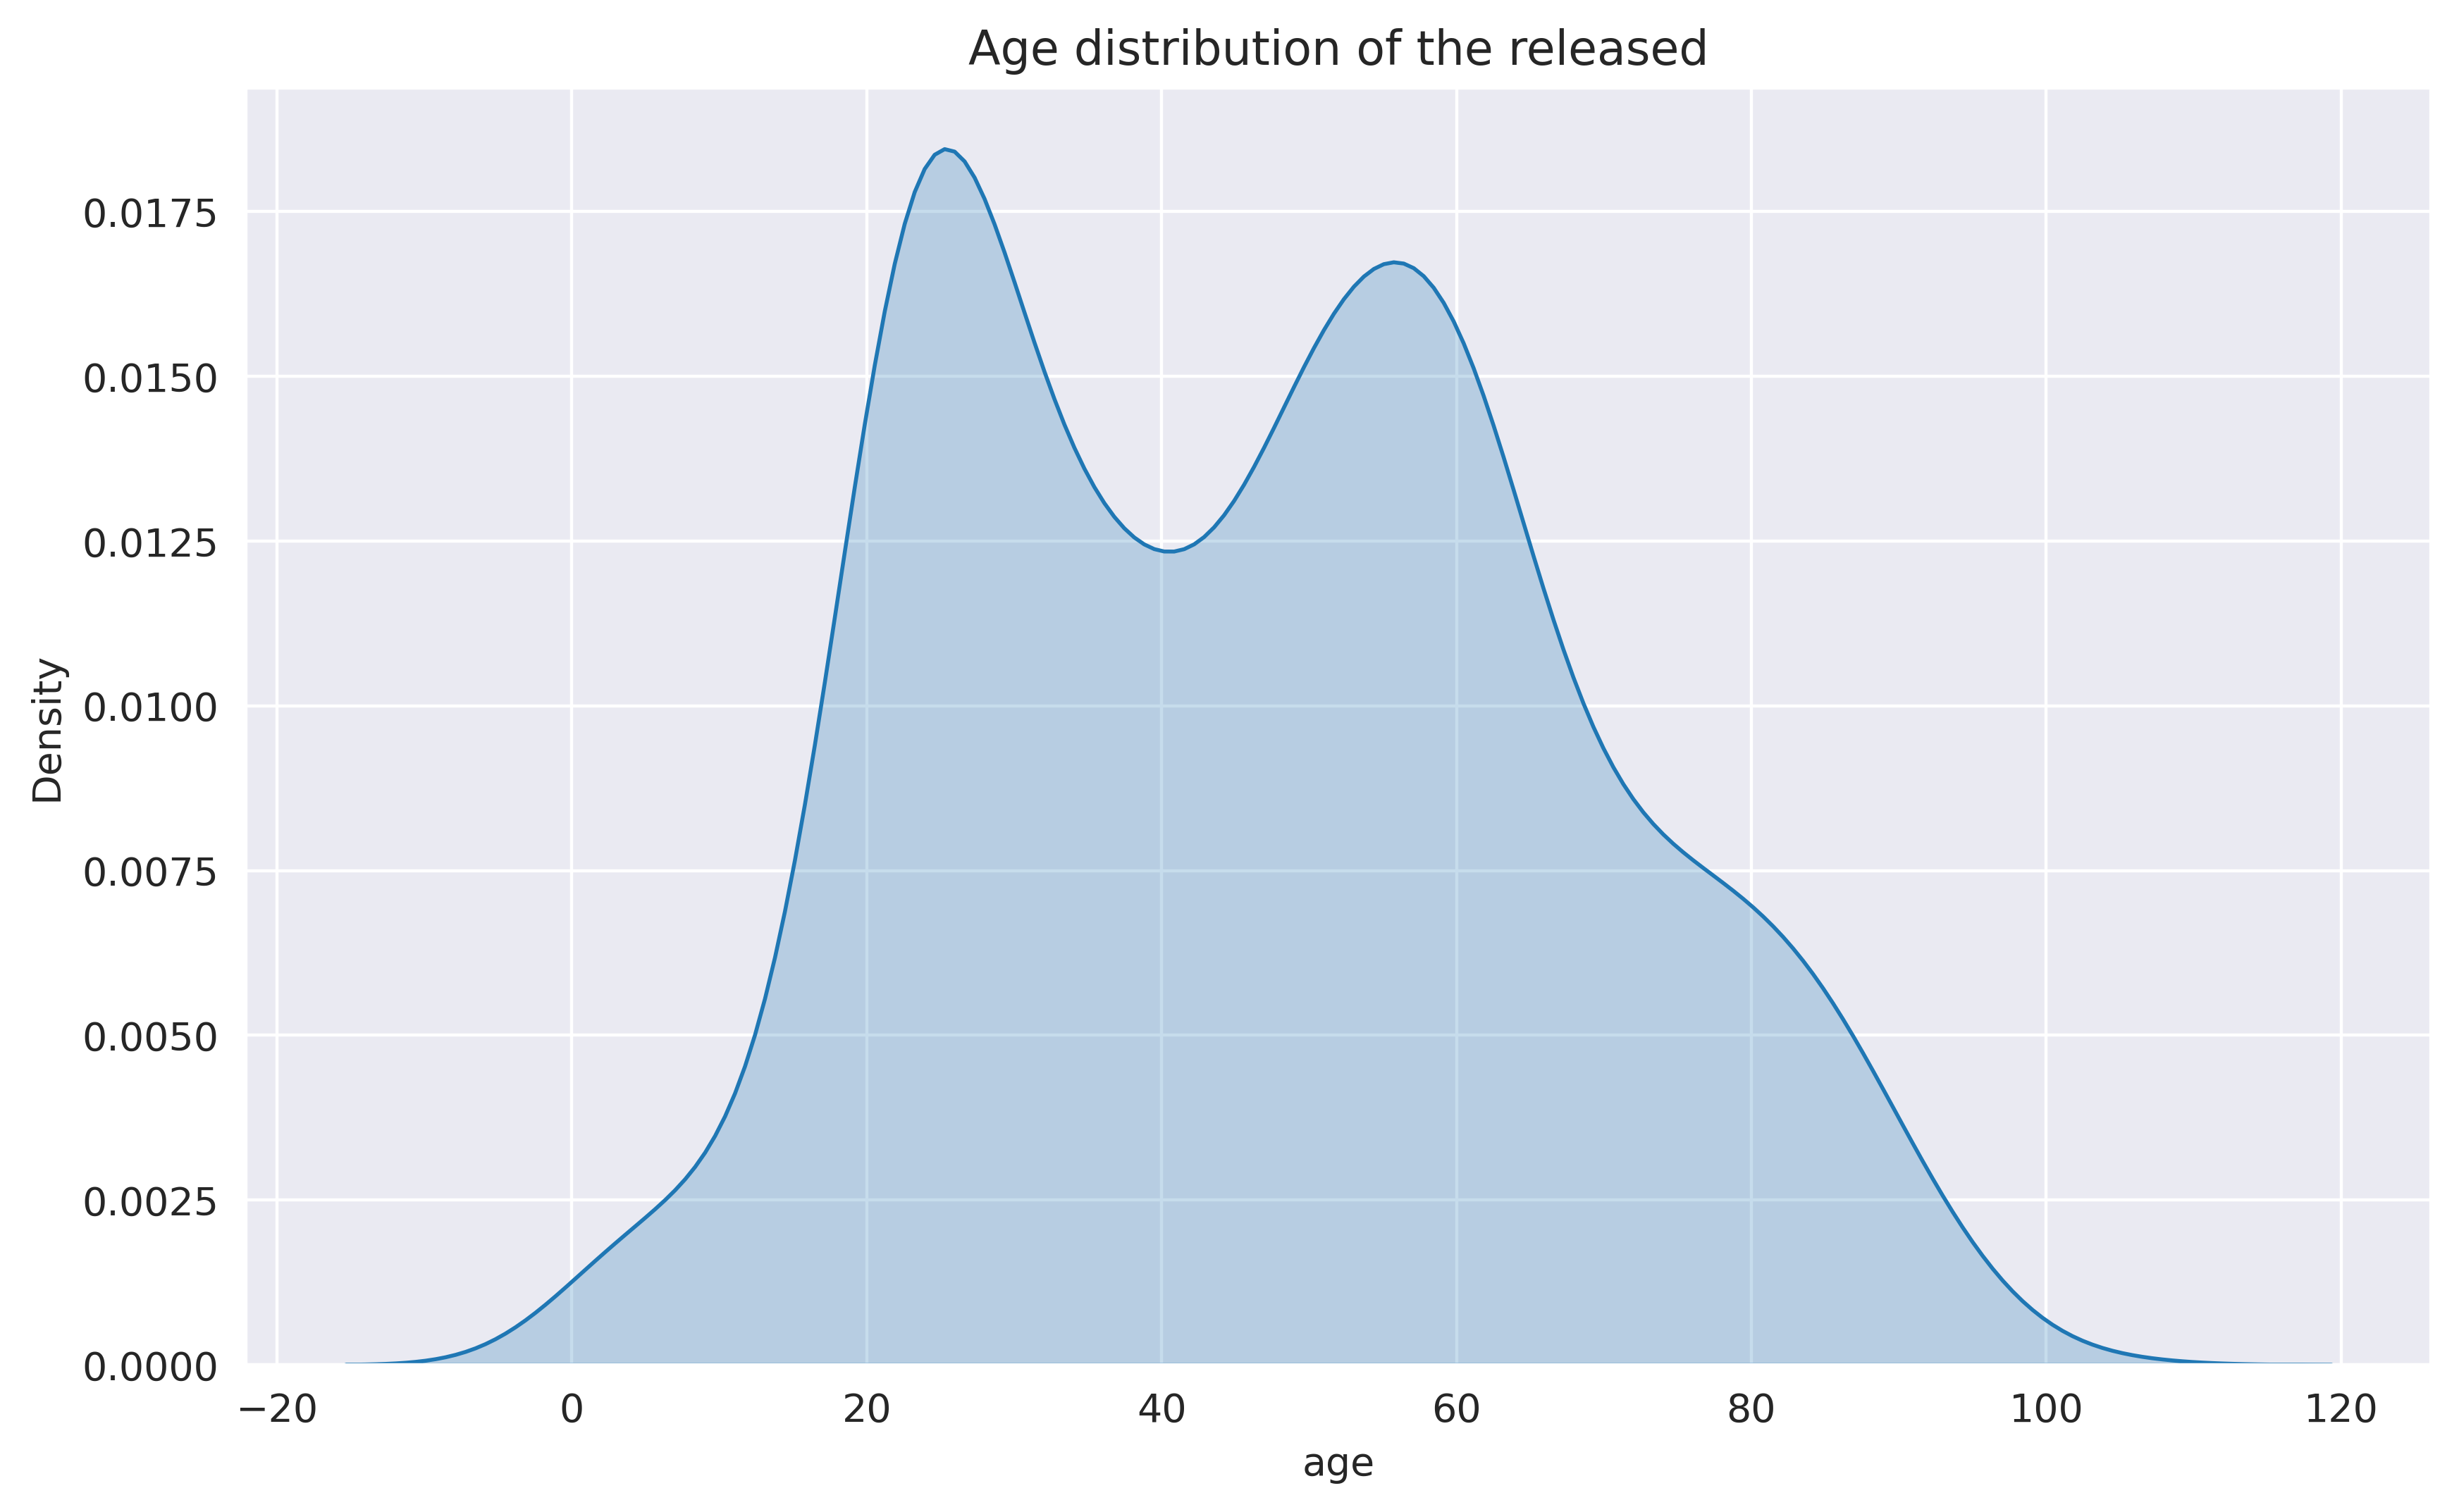

In [30]:
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=isolated_state['age'],shade=True)

###5. 사망자에 따른 성별(gender) 데이터

In [31]:
male_dead = dead[dead.gender == 'male']
female_dead = dead[dead.gender == 'female']

print(male_dead.info())
print(female_dead.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

성별에 따른 사망자의 연령분포

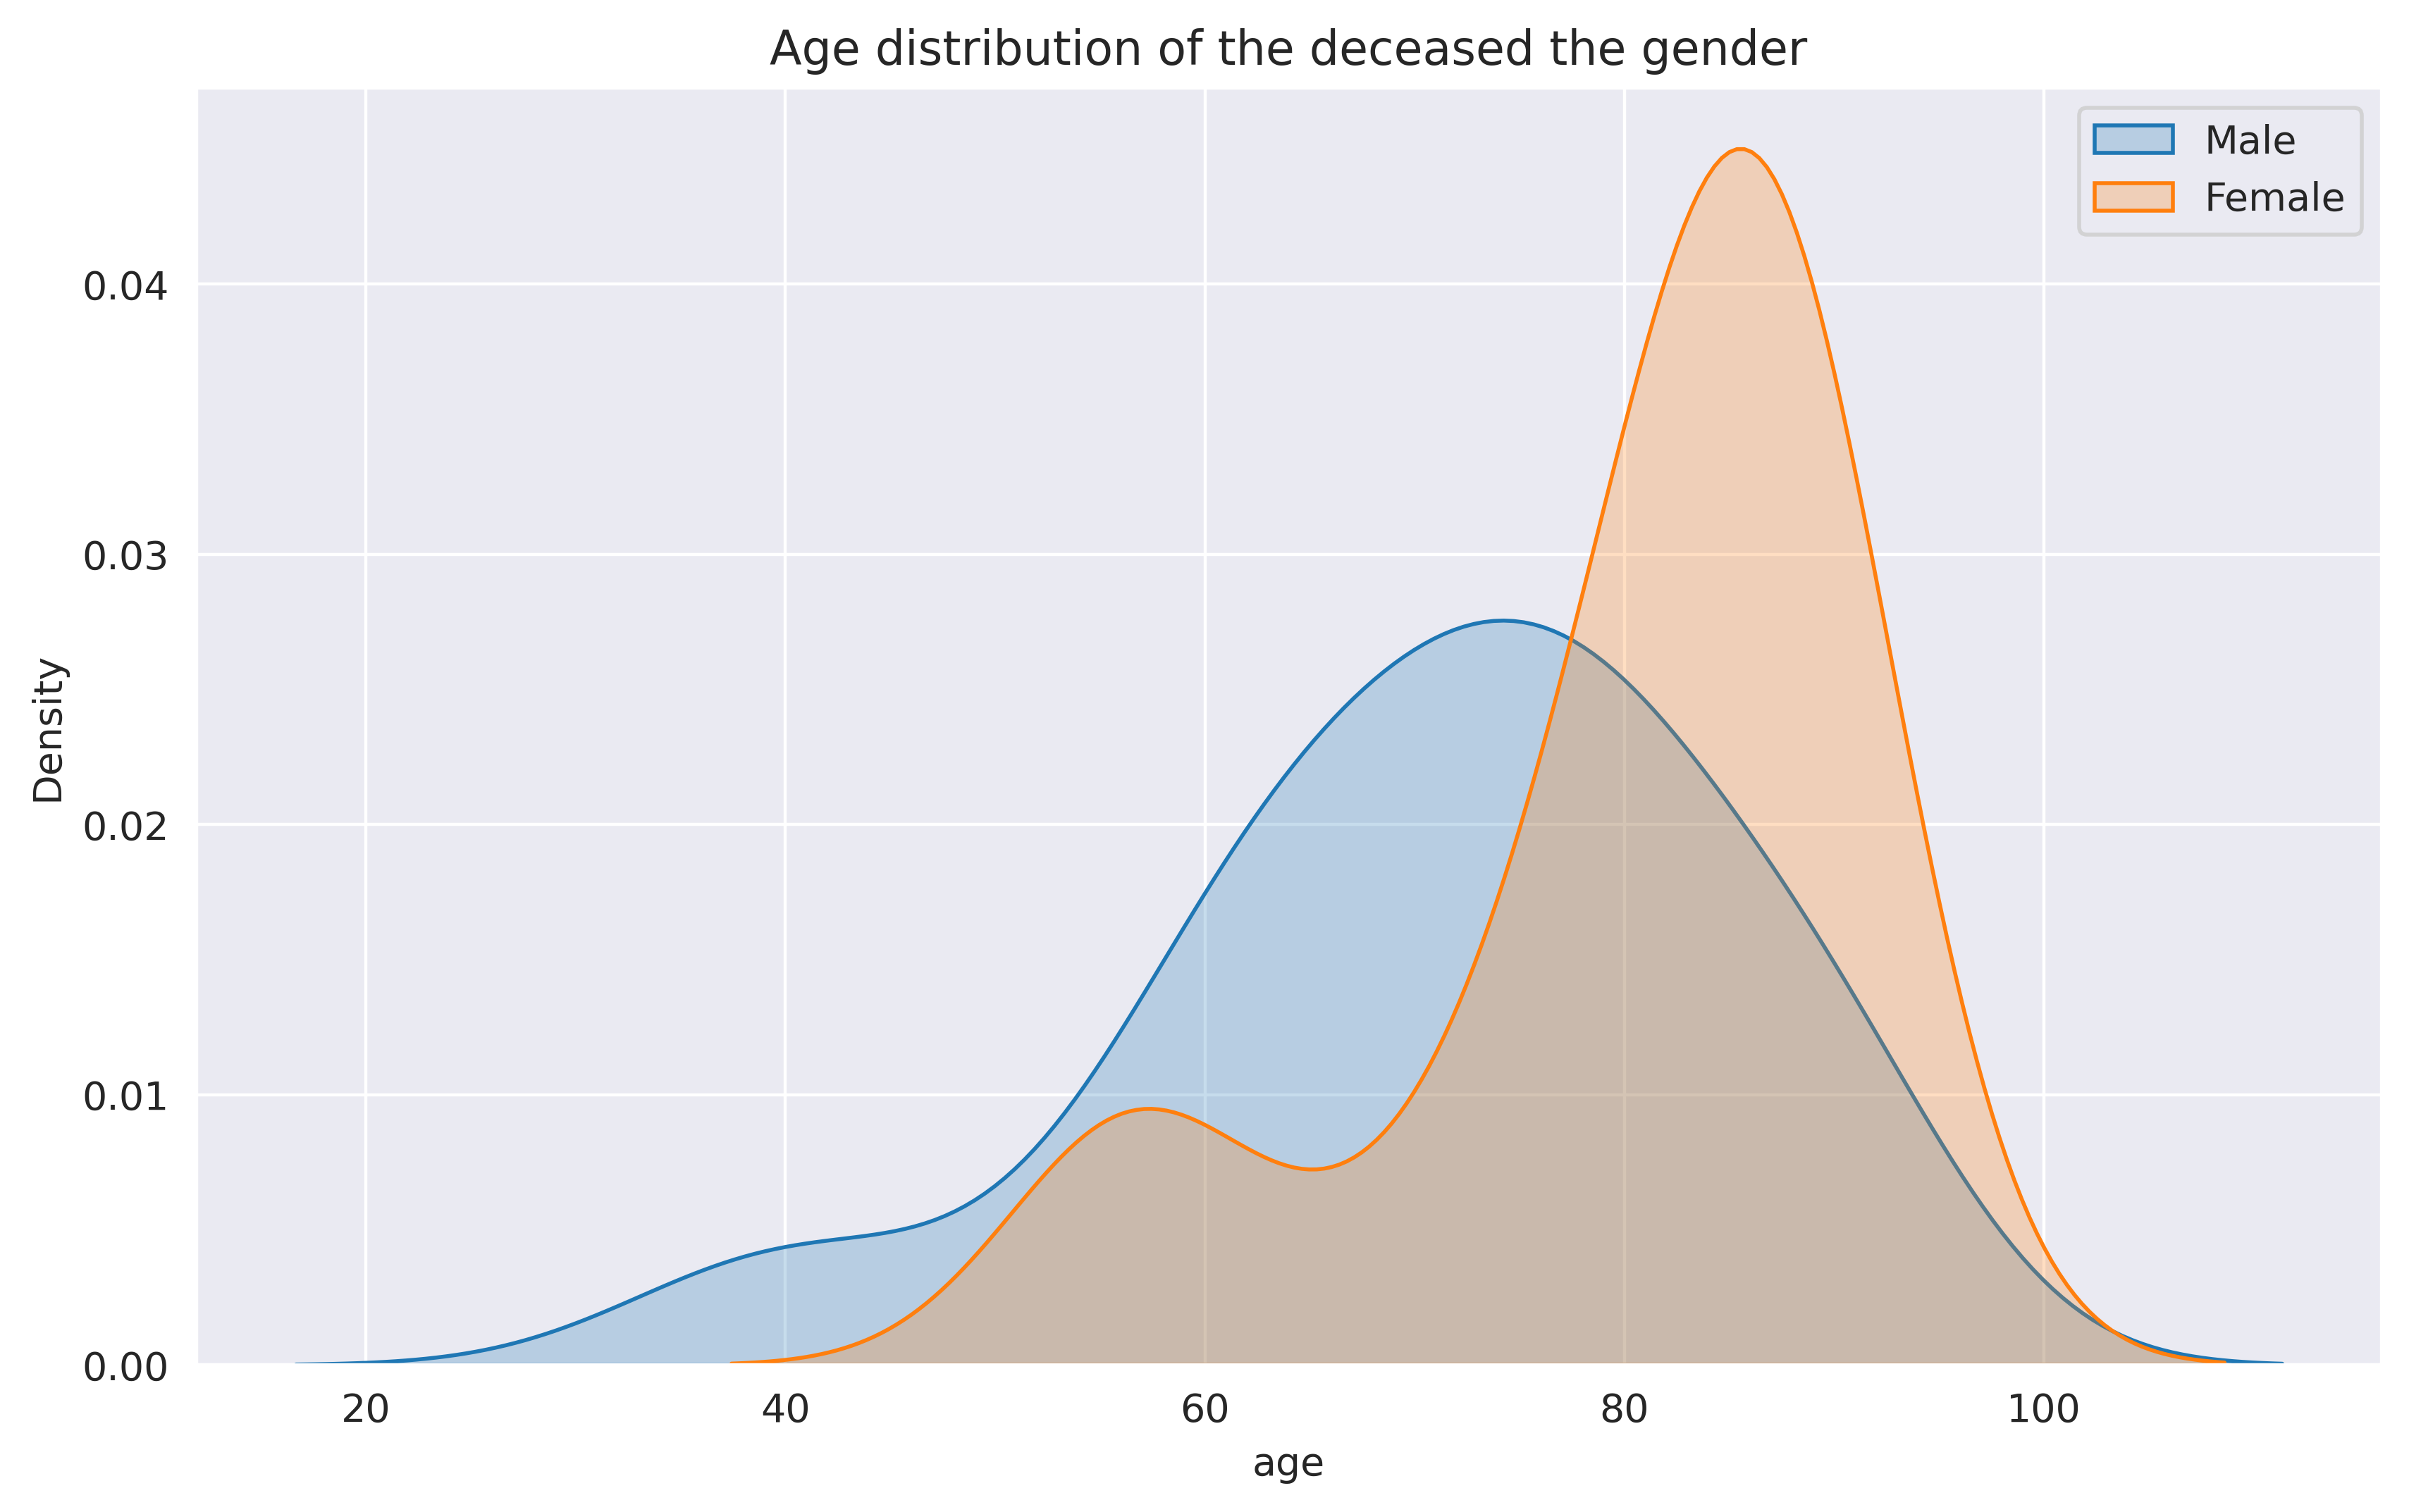

In [32]:
#성별에 따른 사망자의 연령분포
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased the gender")
sns.kdeplot(data=male_dead['age'], label='Male', shade=True)
sns.kdeplot(data=female_dead['age'], label='Female',shade=True)
plt.legend()

###KDE: Kernel Destiny Estimator 추간한 distplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



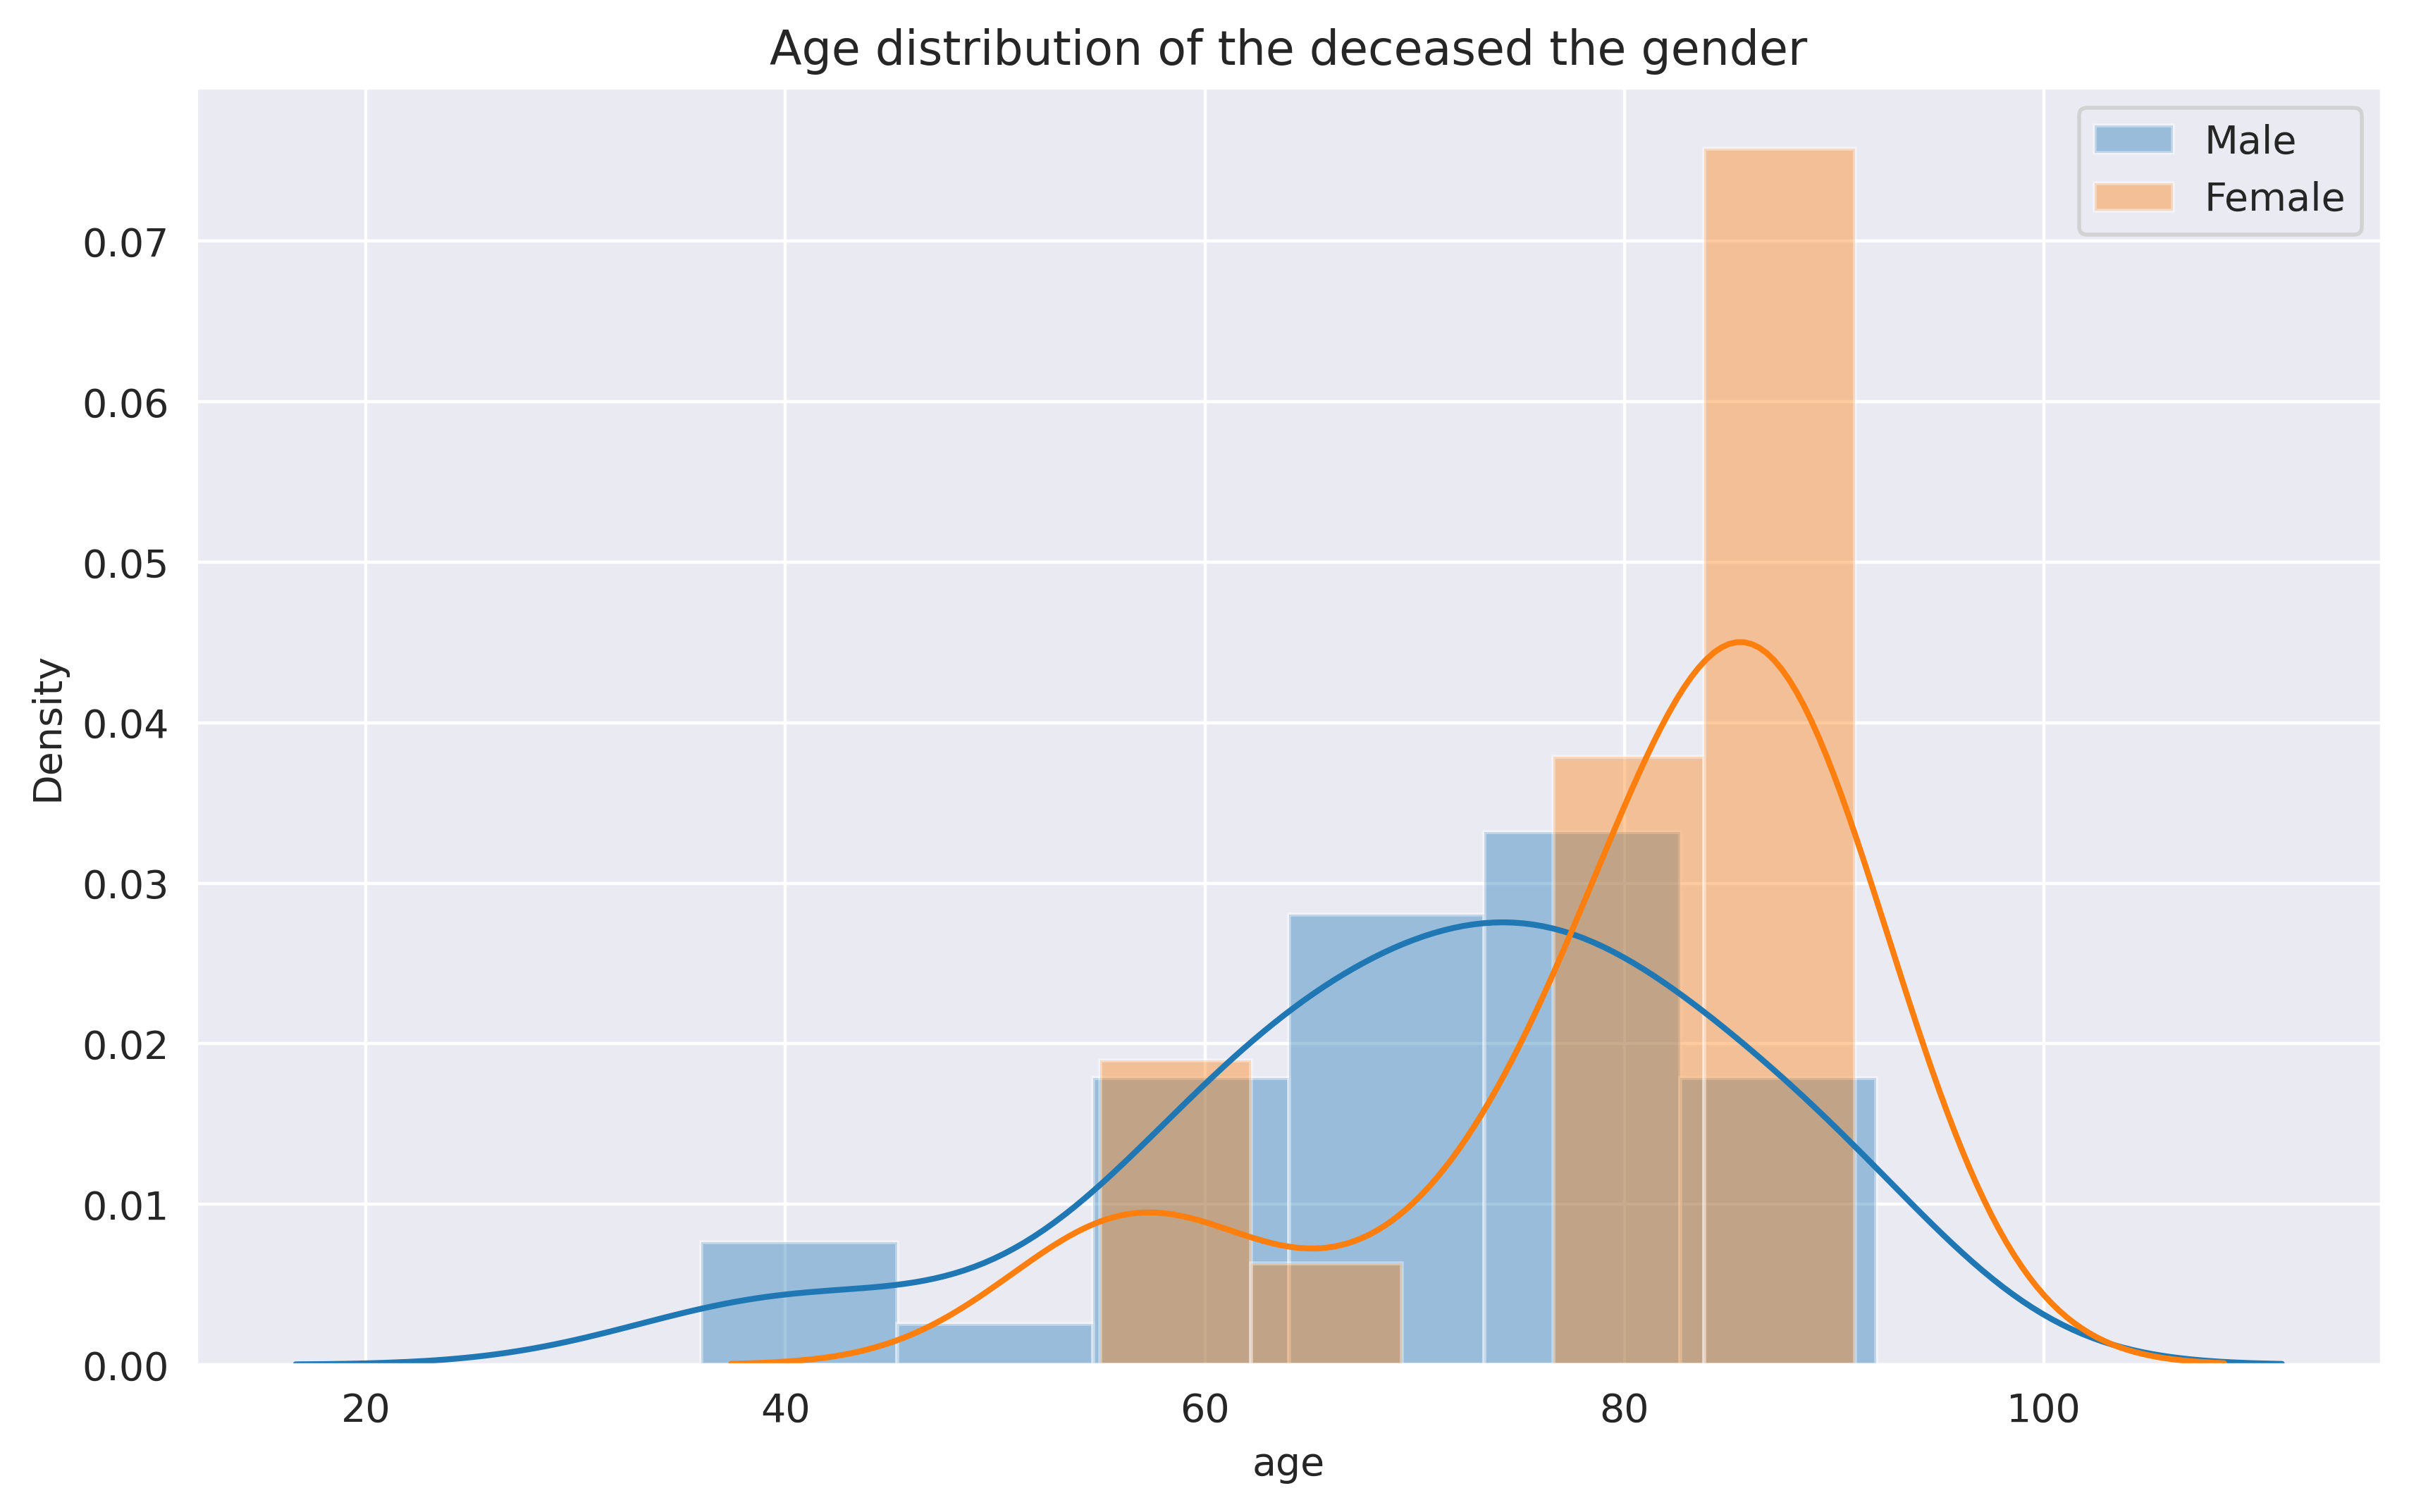

In [33]:
#성별에 따른 사망자의 연령분포
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased the gender")
sns.distplot(a=male_dead['age'], label='Male', kde=True)
sns.distplot(a=female_dead['age'], label='Female',kde=True)
plt.legend()

###사망자 성별 비교 -> 바차트,파이차트 -> 분포

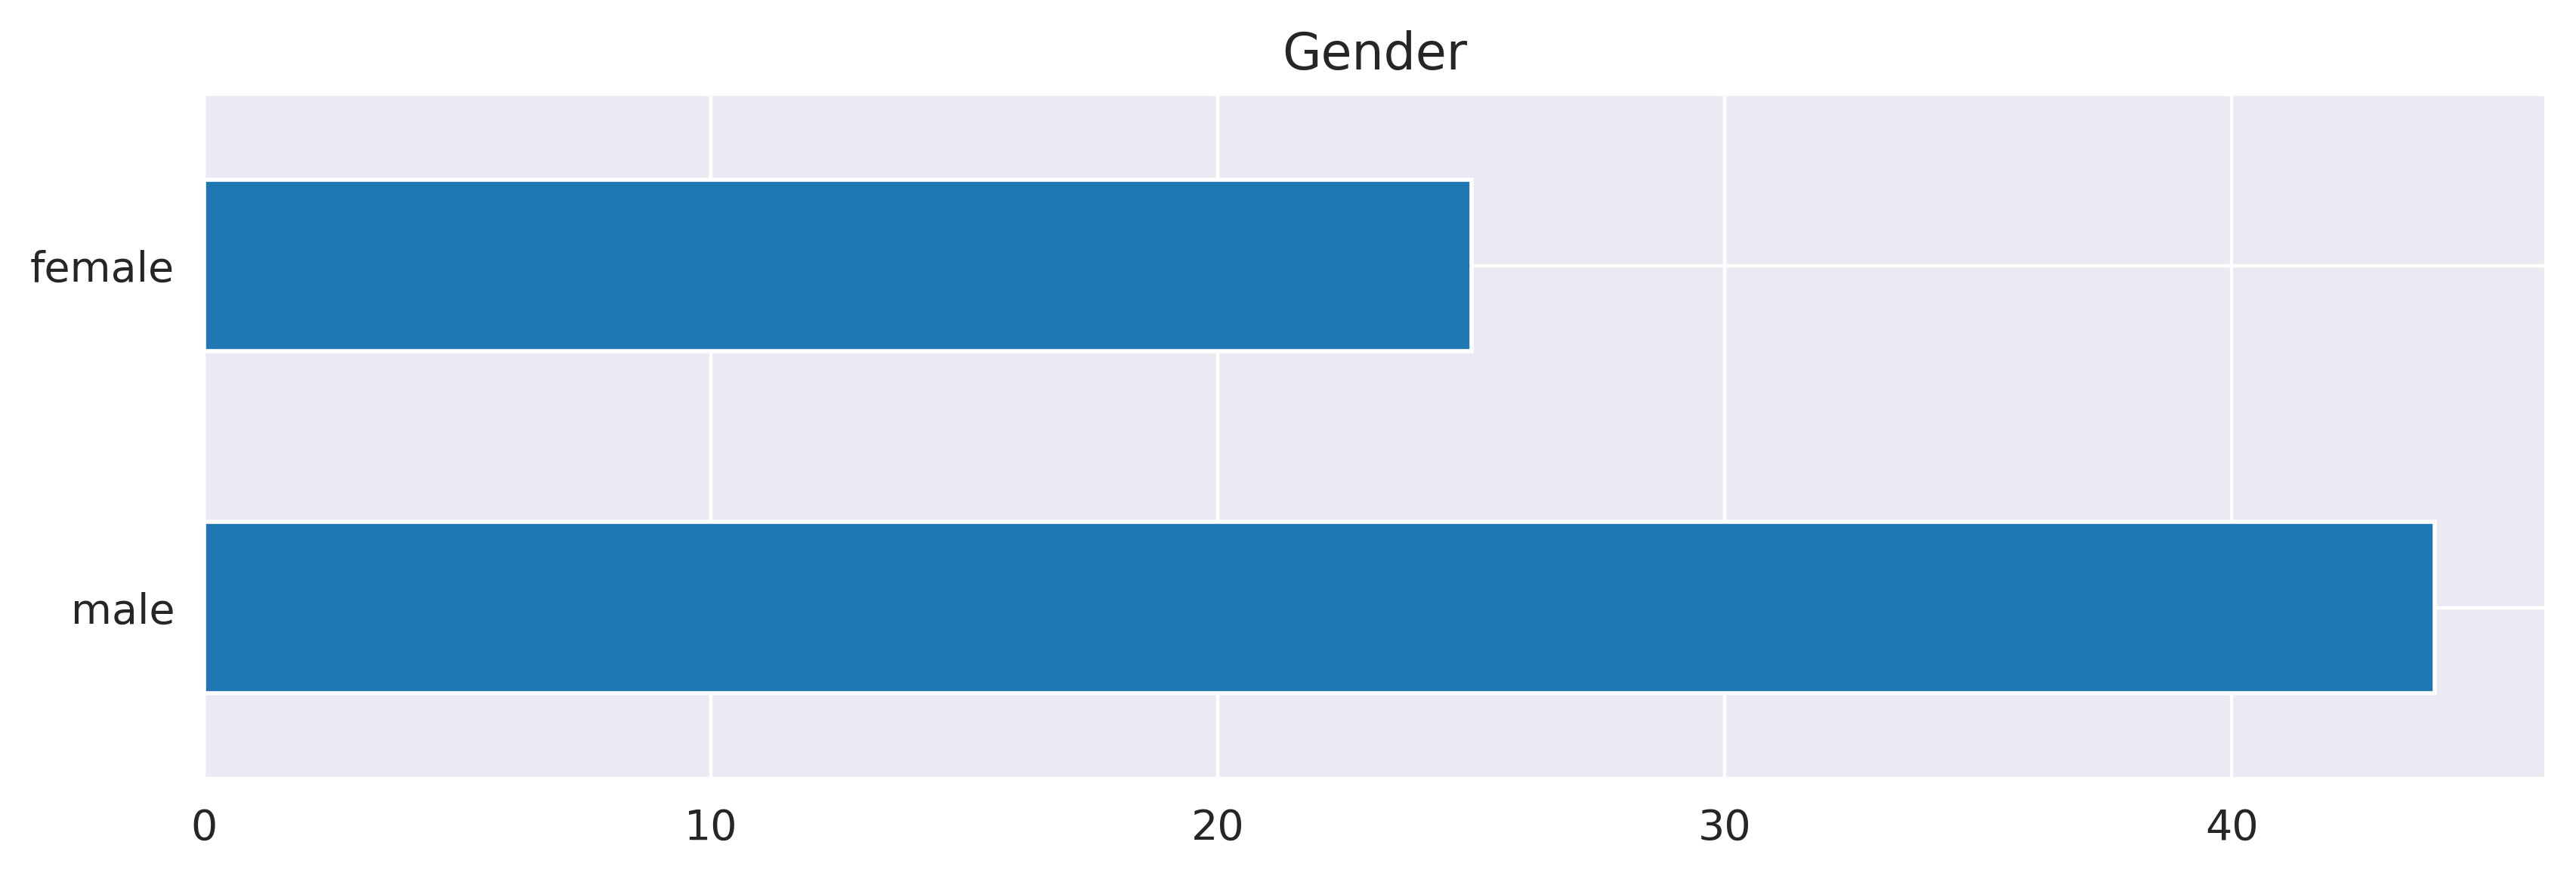

In [34]:
plt.figure(figsize=(10,3),dpi=200)
plt.title("Gender")
dead.gender.value_counts().plot.barh()

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


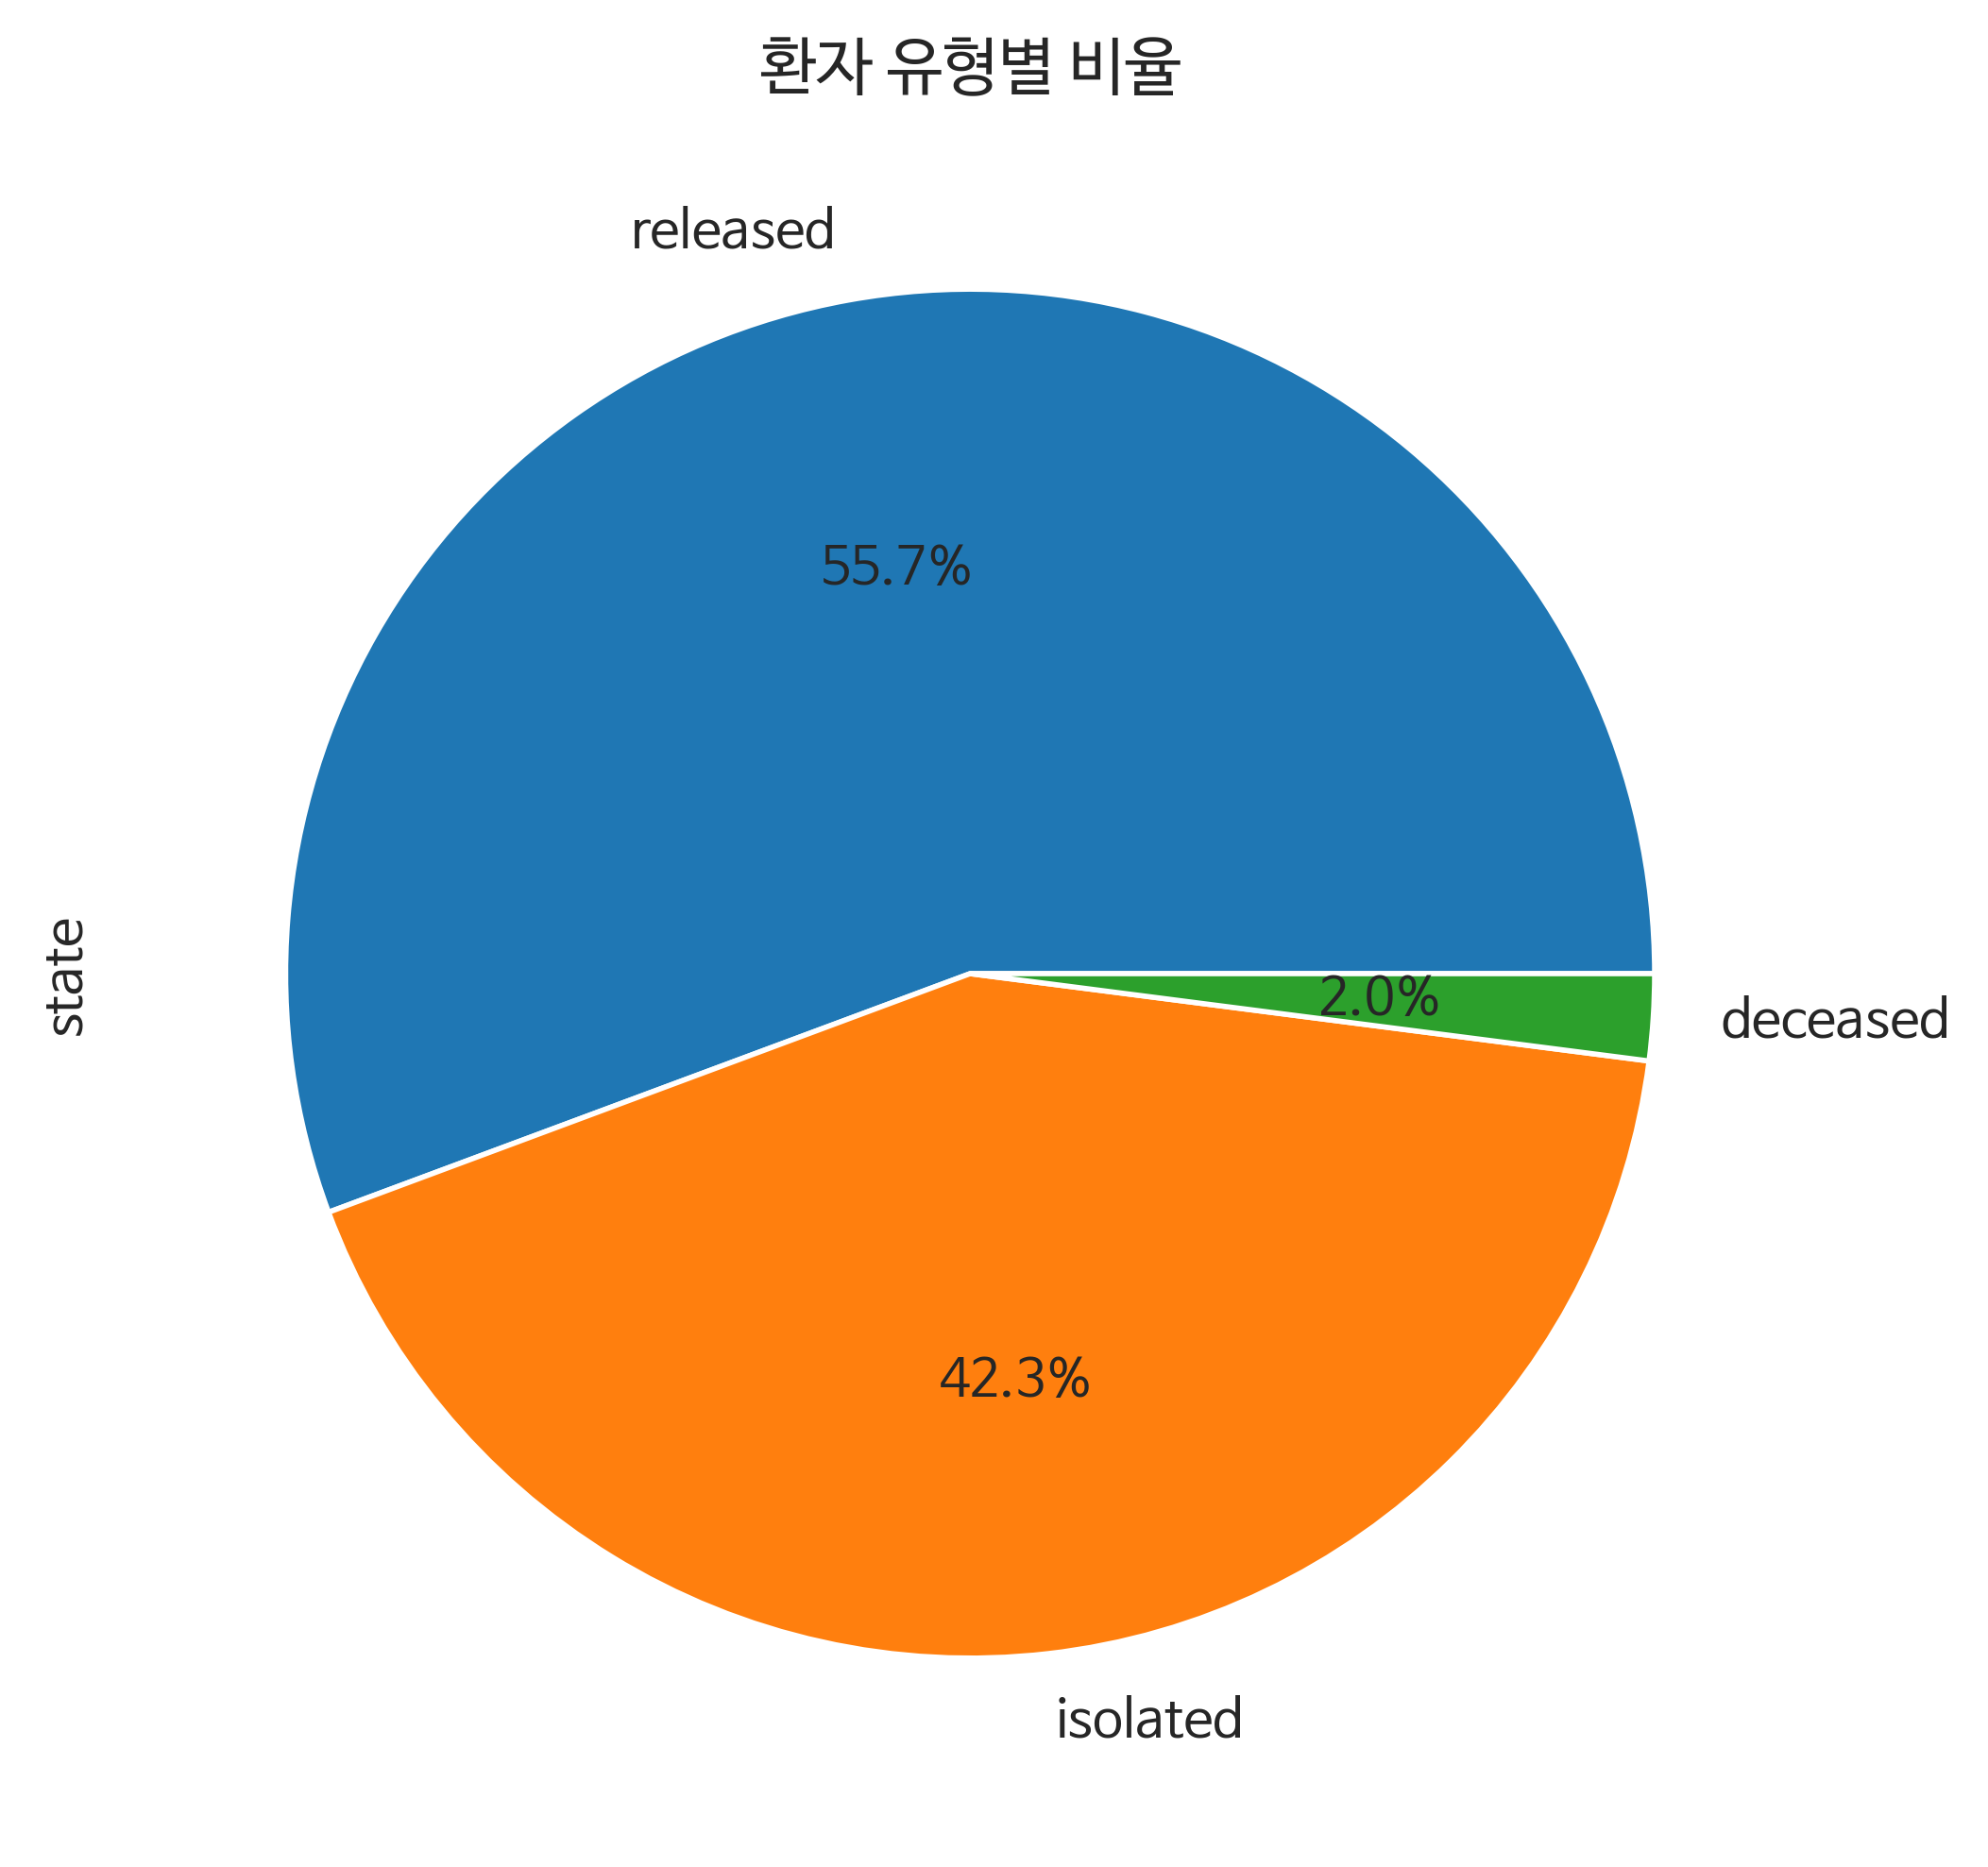

In [36]:
plt.figure(figsize=(10,6),dpi=200)
plt.title("환자 유형별 비율")
df_patient.state.value_counts().plot.pie(autopct = '%.1f%%')

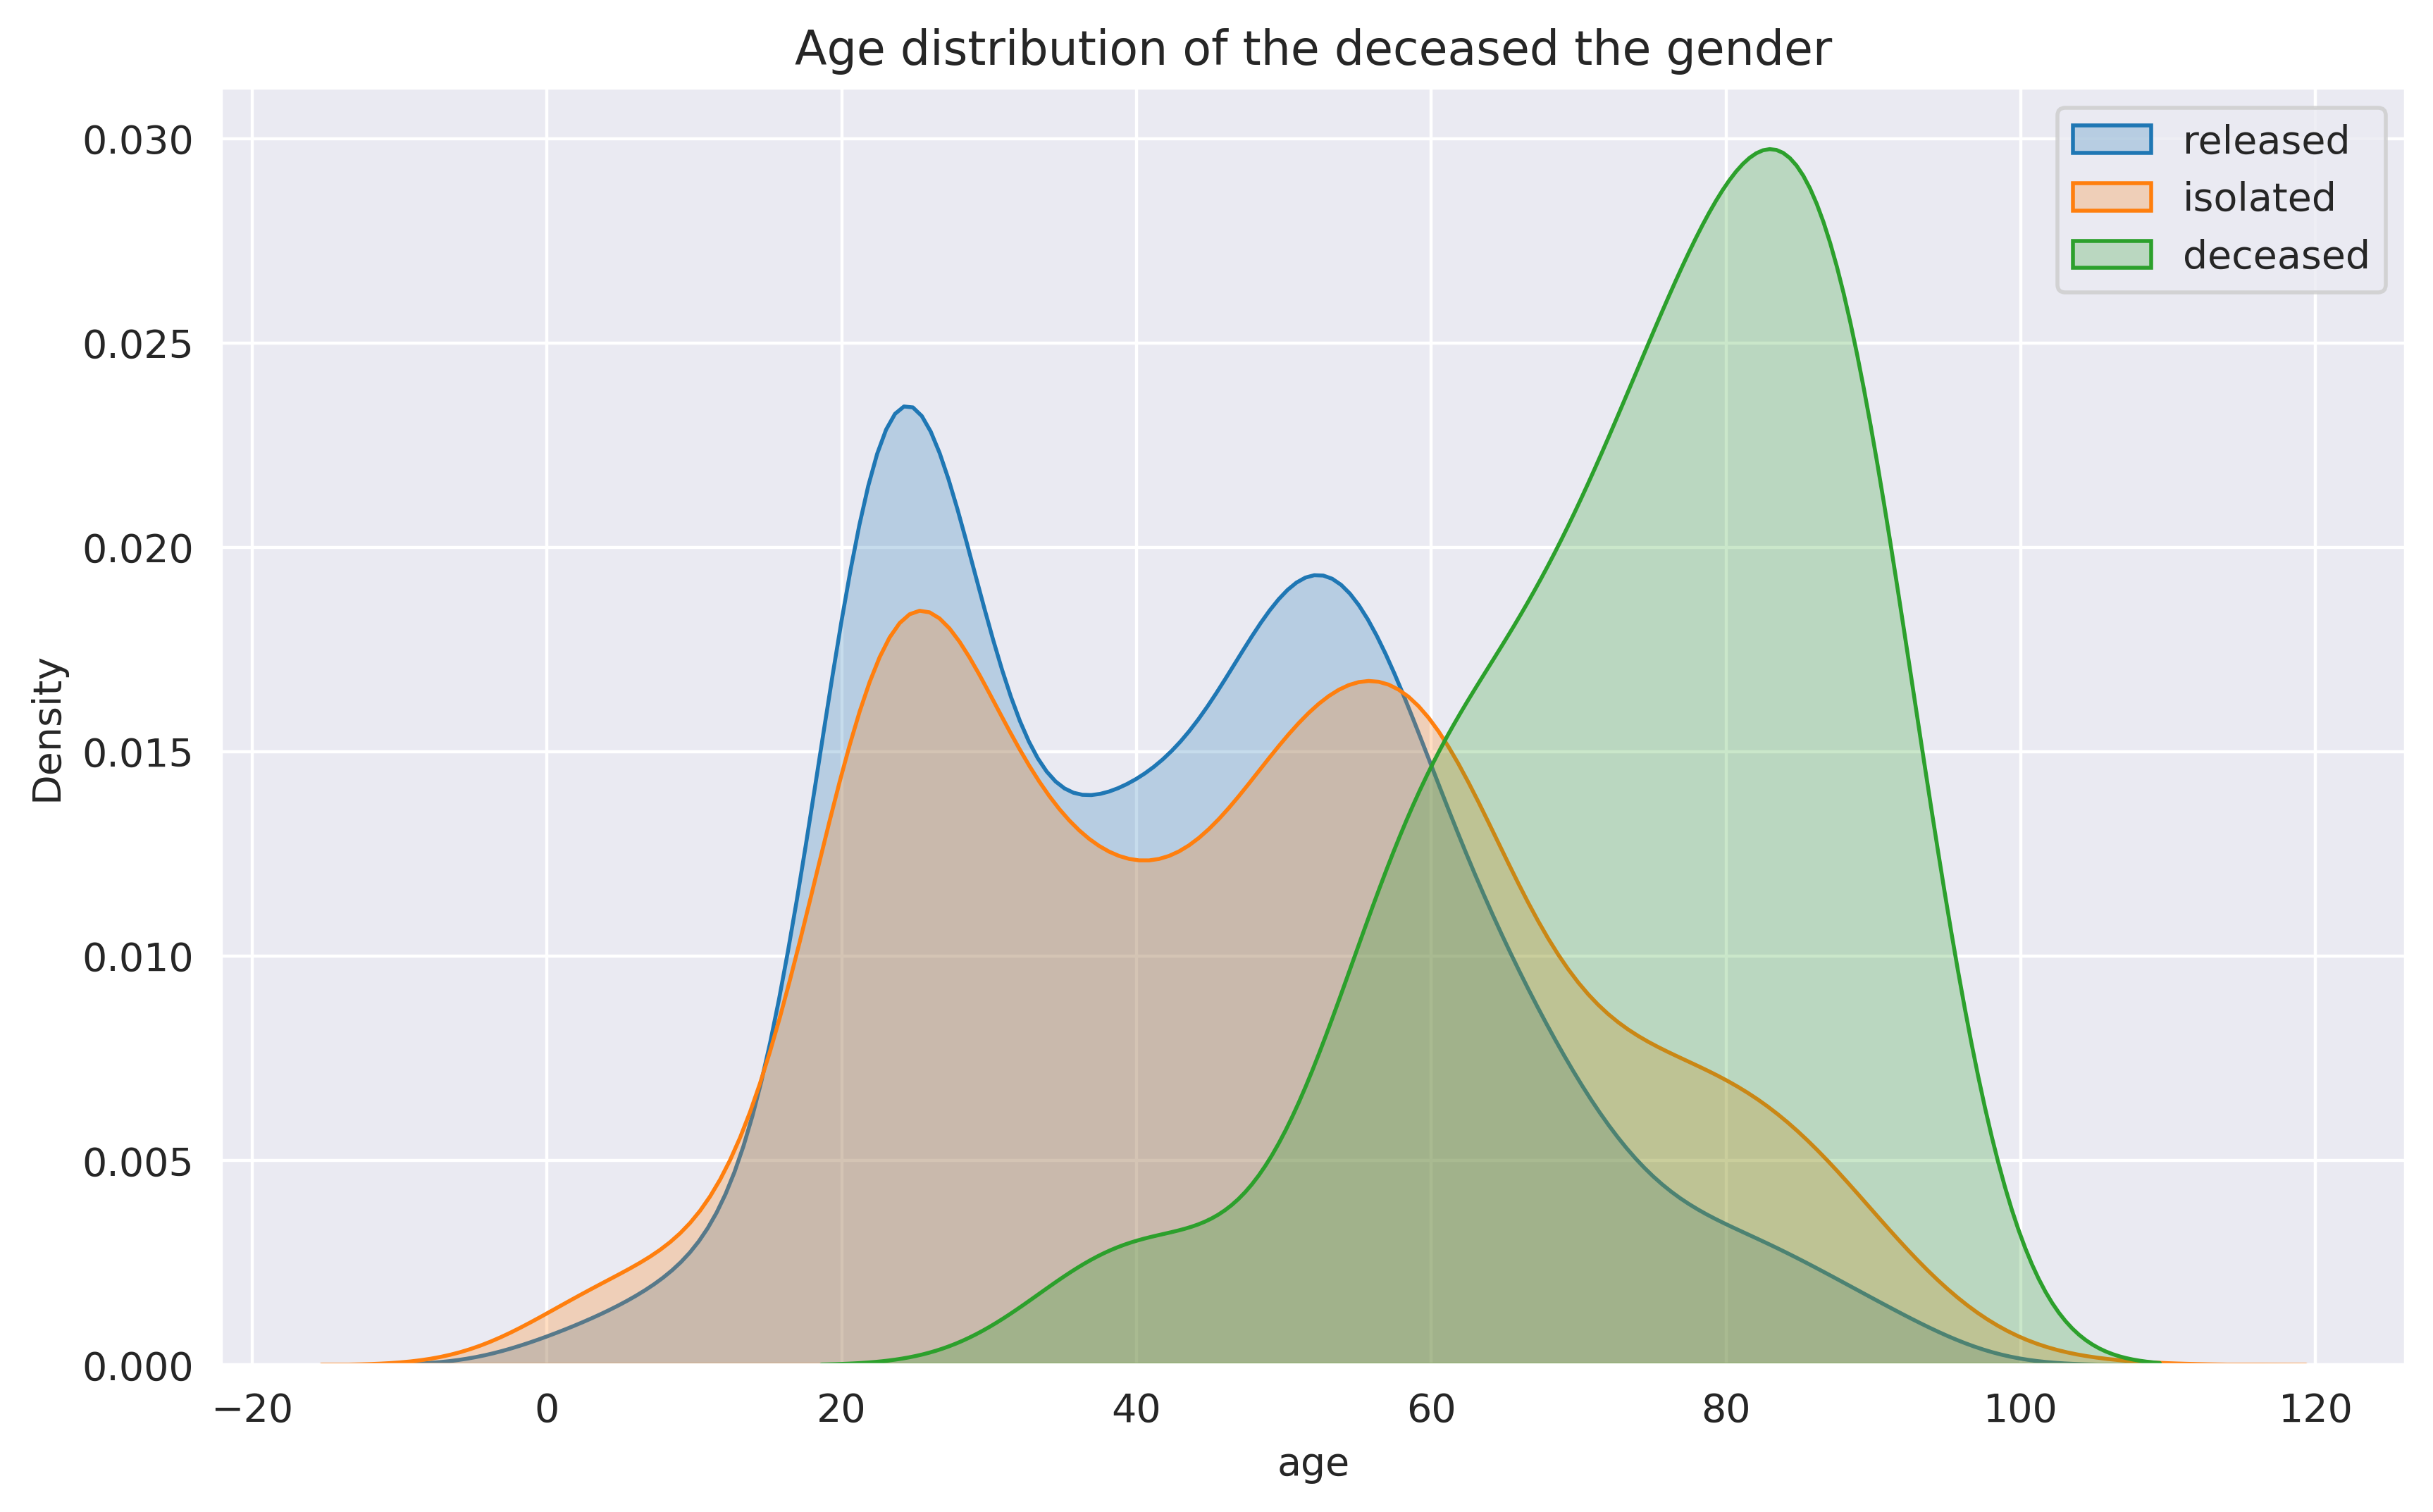

In [37]:
#환자 유형별 (격리해제자, 격리중인 환자, 사망자) 연령 분포

#성별에 따른 사망자의 연령분포
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased the gender")
sns.kdeplot(data=released['age'],label="released",shade=True)
sns.kdeplot(data=isolated_state['age'],label="isolated",shade=True)
sns.kdeplot(data=dead['age'],label="deceased",shade=True)
plt.legend()

###저희 환자 유형별 (격리해제자, 격리중, 사망) 비율 파이차트로 그려보세요


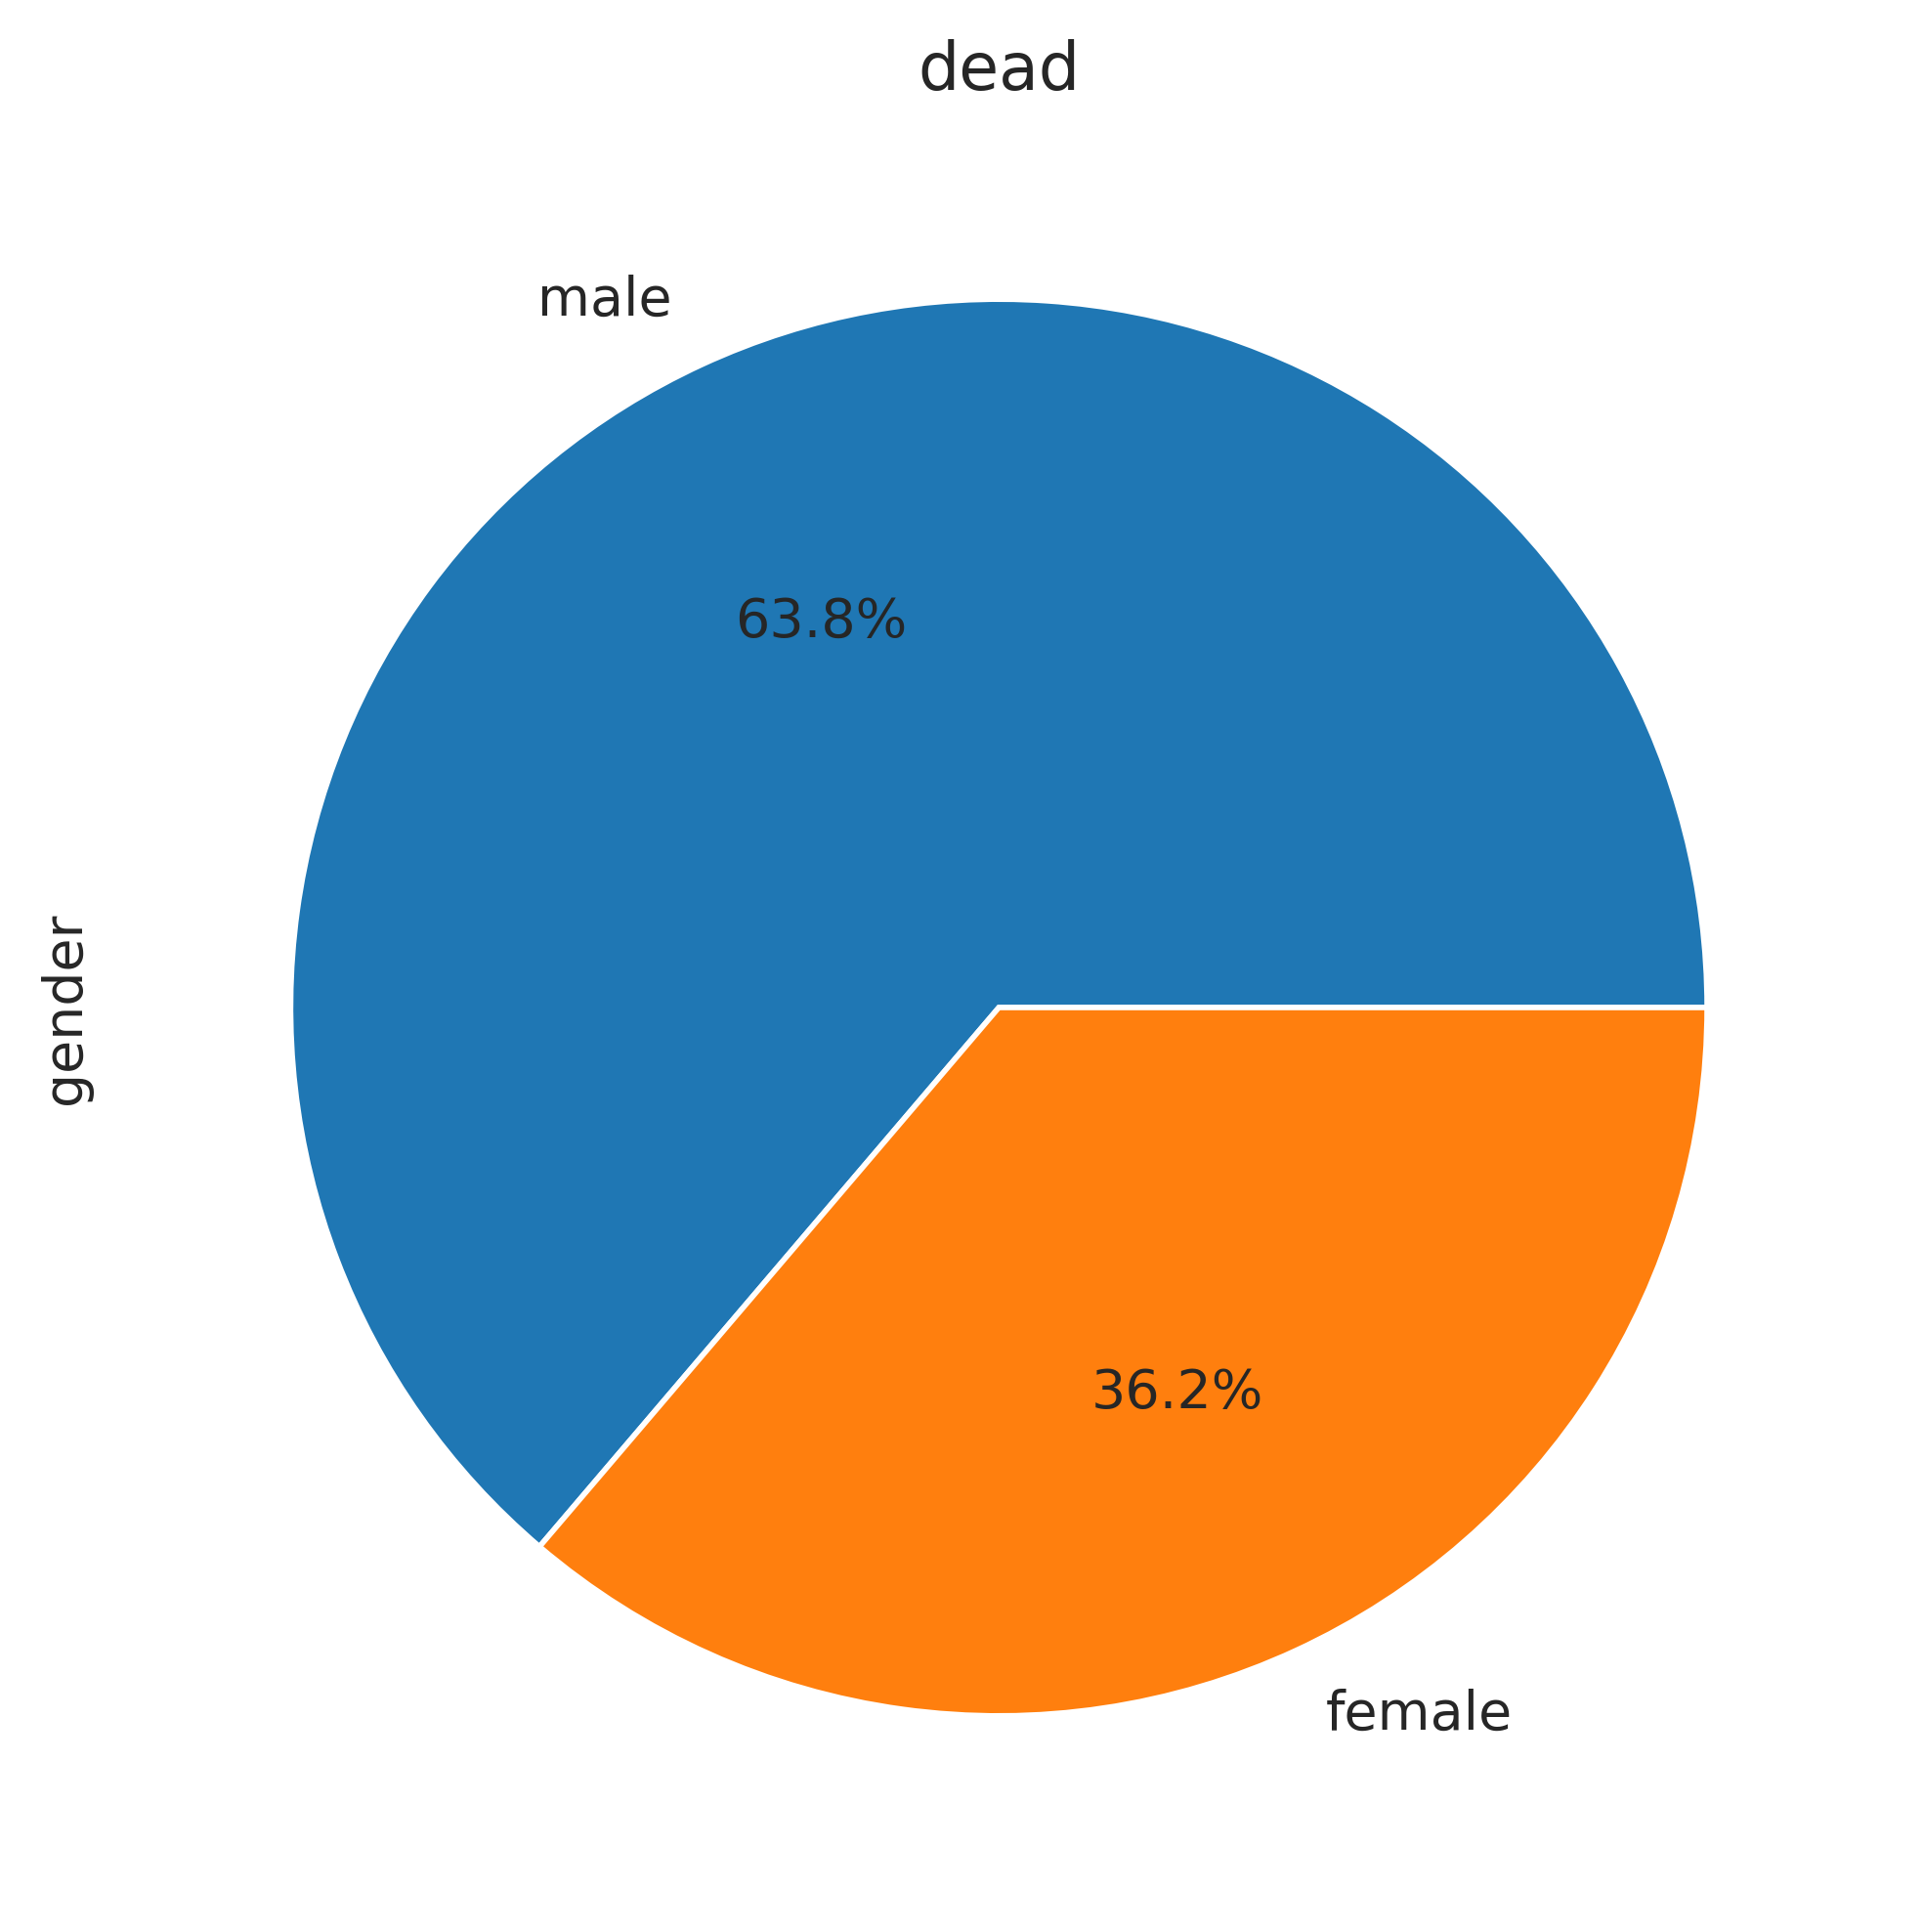

In [51]:
plt.figure(figsize=(10,6),dpi=200)
plt.title("dead")
dead.gender.value_counts().plot.pie(autopct = '%.1f%%')

In [48]:
dead

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,91.0,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,44.0,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,79.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,73.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,6020100107,107.0,male,1953.0,67.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased
3152,6020100205,205.0,female,1965.0,55.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased
3153,6020100286,286.0,male,1958.0,62.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased
3154,6020100298,298.0,male,1962.0,58.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased


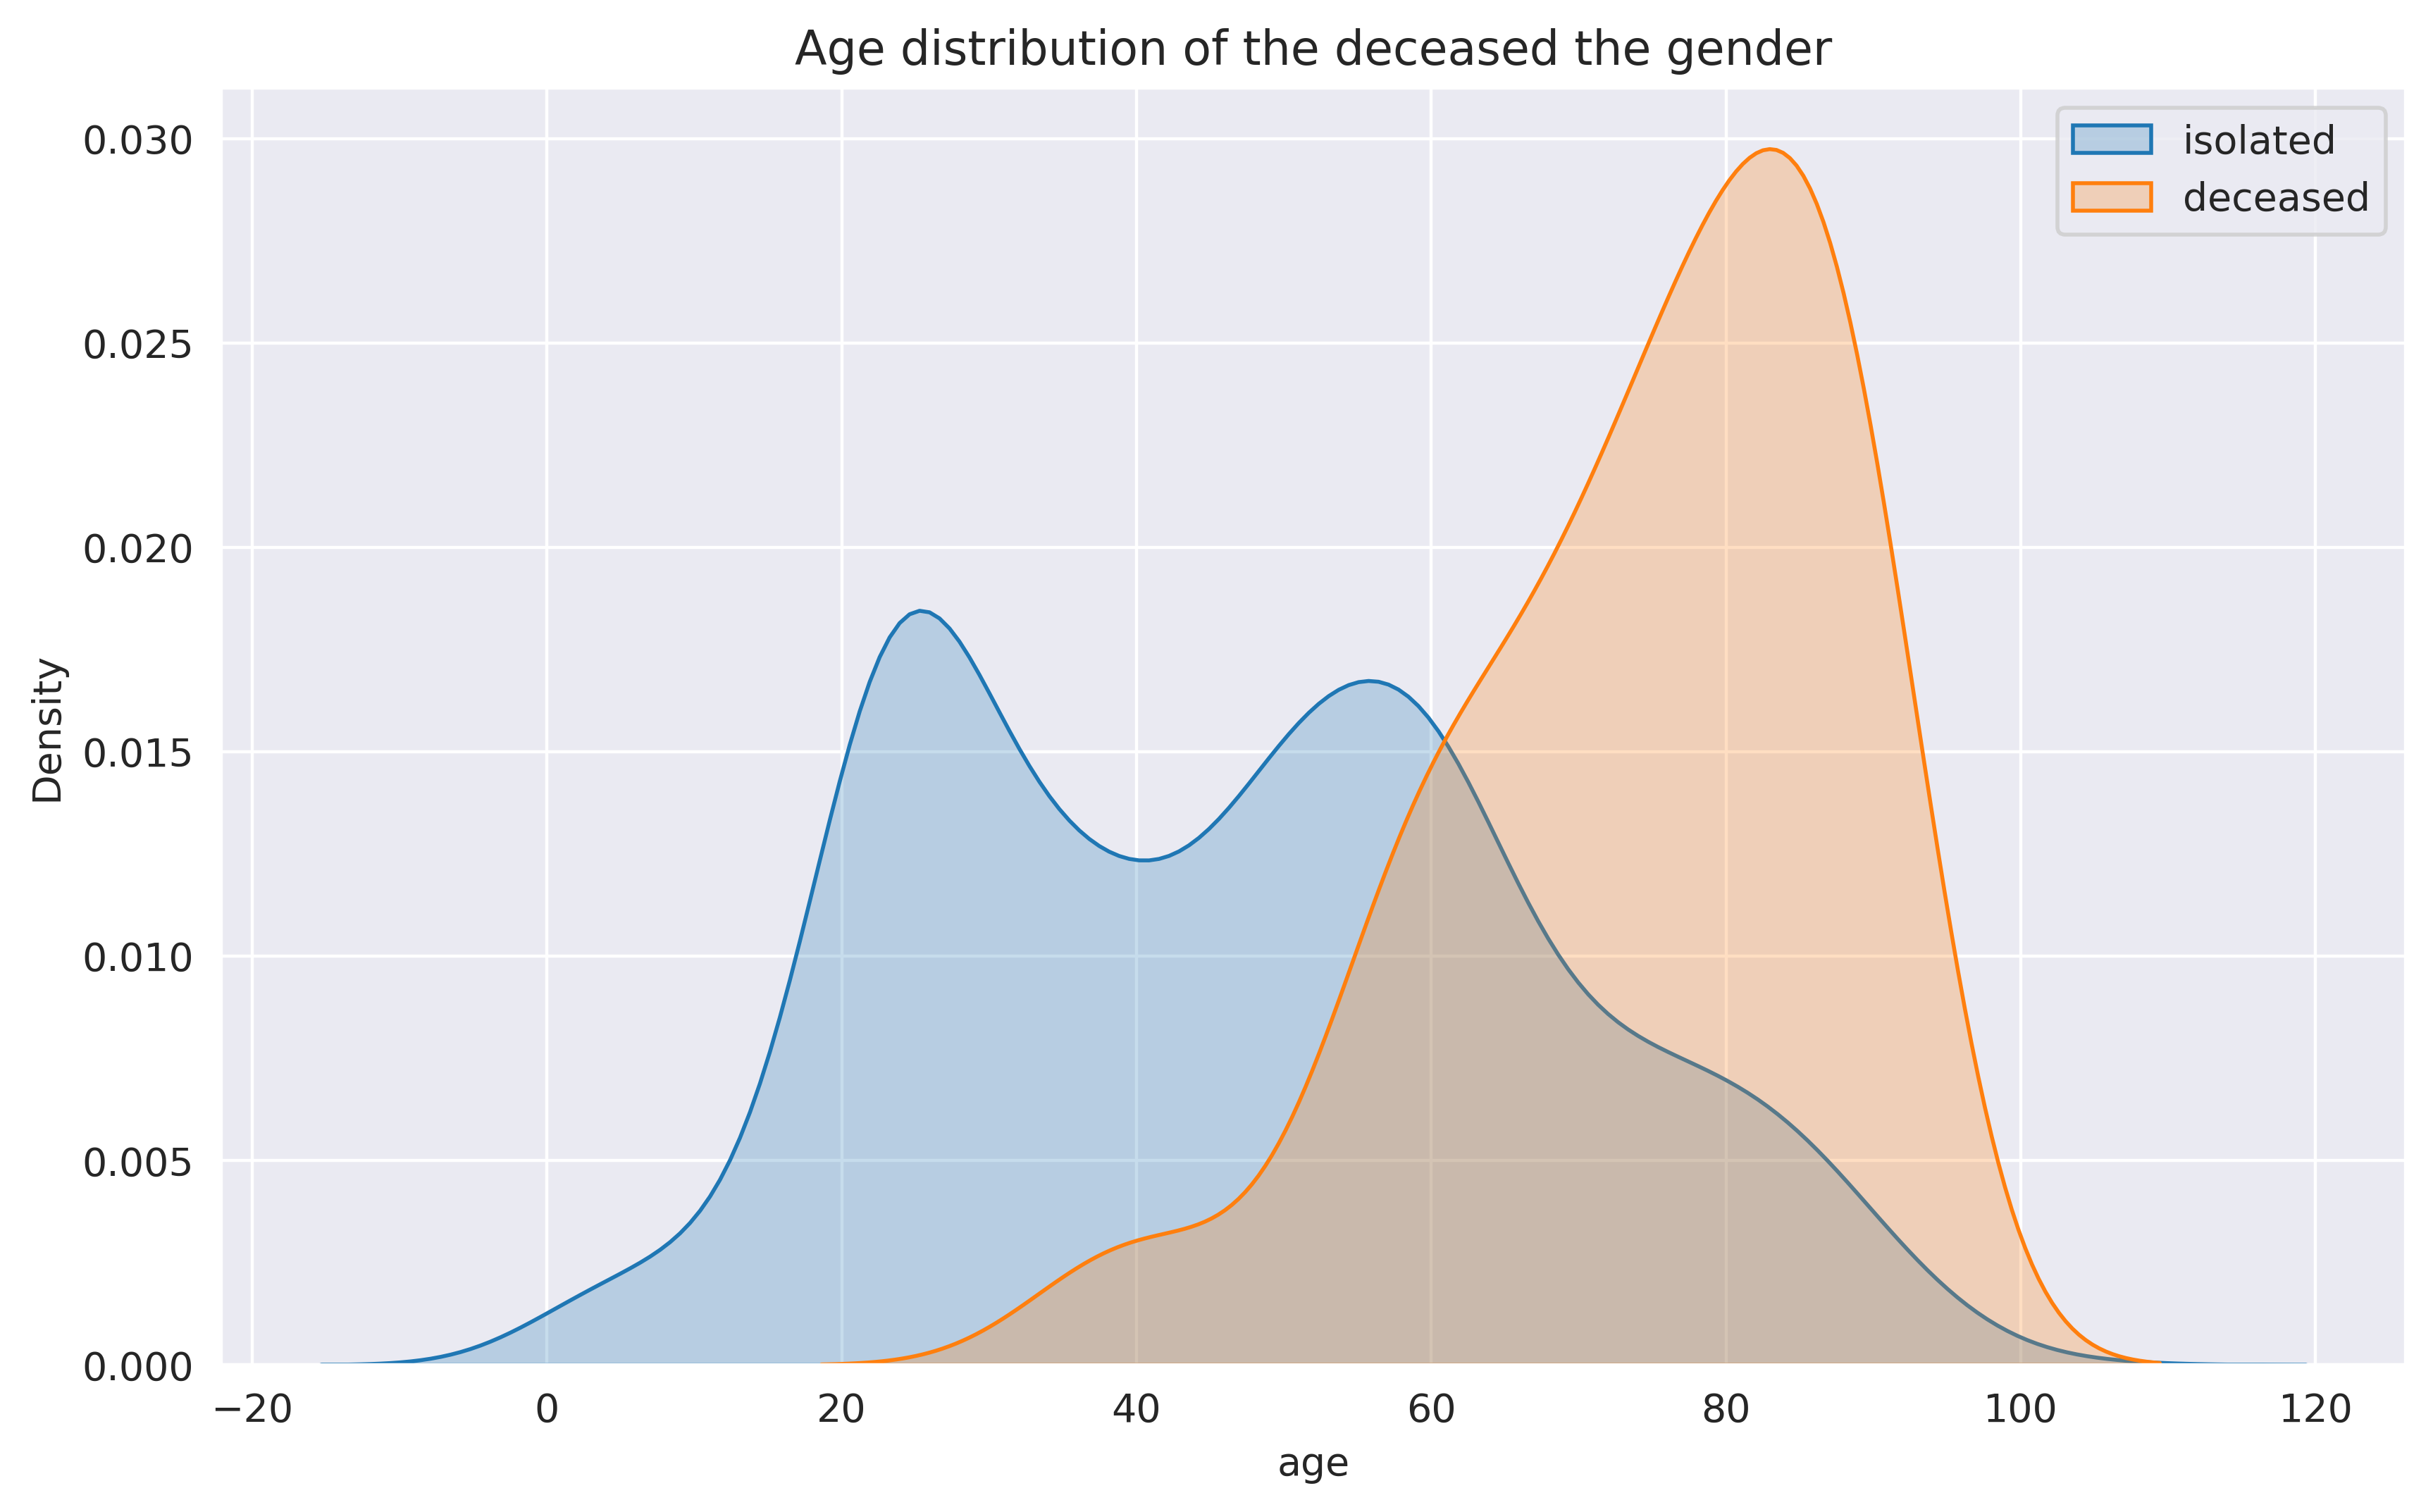

In [64]:
#plt.figure(figsize=(10,6),dpi=200)
#plt.title("dead")
#dead.gender.value_counts().plot.barh(autopct = '%.1f%%')
plt.figure(figsize=(10,6),dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased the gender")
plt.plot(data=released['age'],label="released",shade=True)
sns.kdeplot(data=isolated_state['age'],label="isolated",shade=True)
sns.kdeplot(data=dead['age'],label="deceased",shade=True)
plt.legend()


In [89]:
date = '2018-10-25'
pd.to_datetime(date)

Timestamp('2018-10-25 00:00:00')

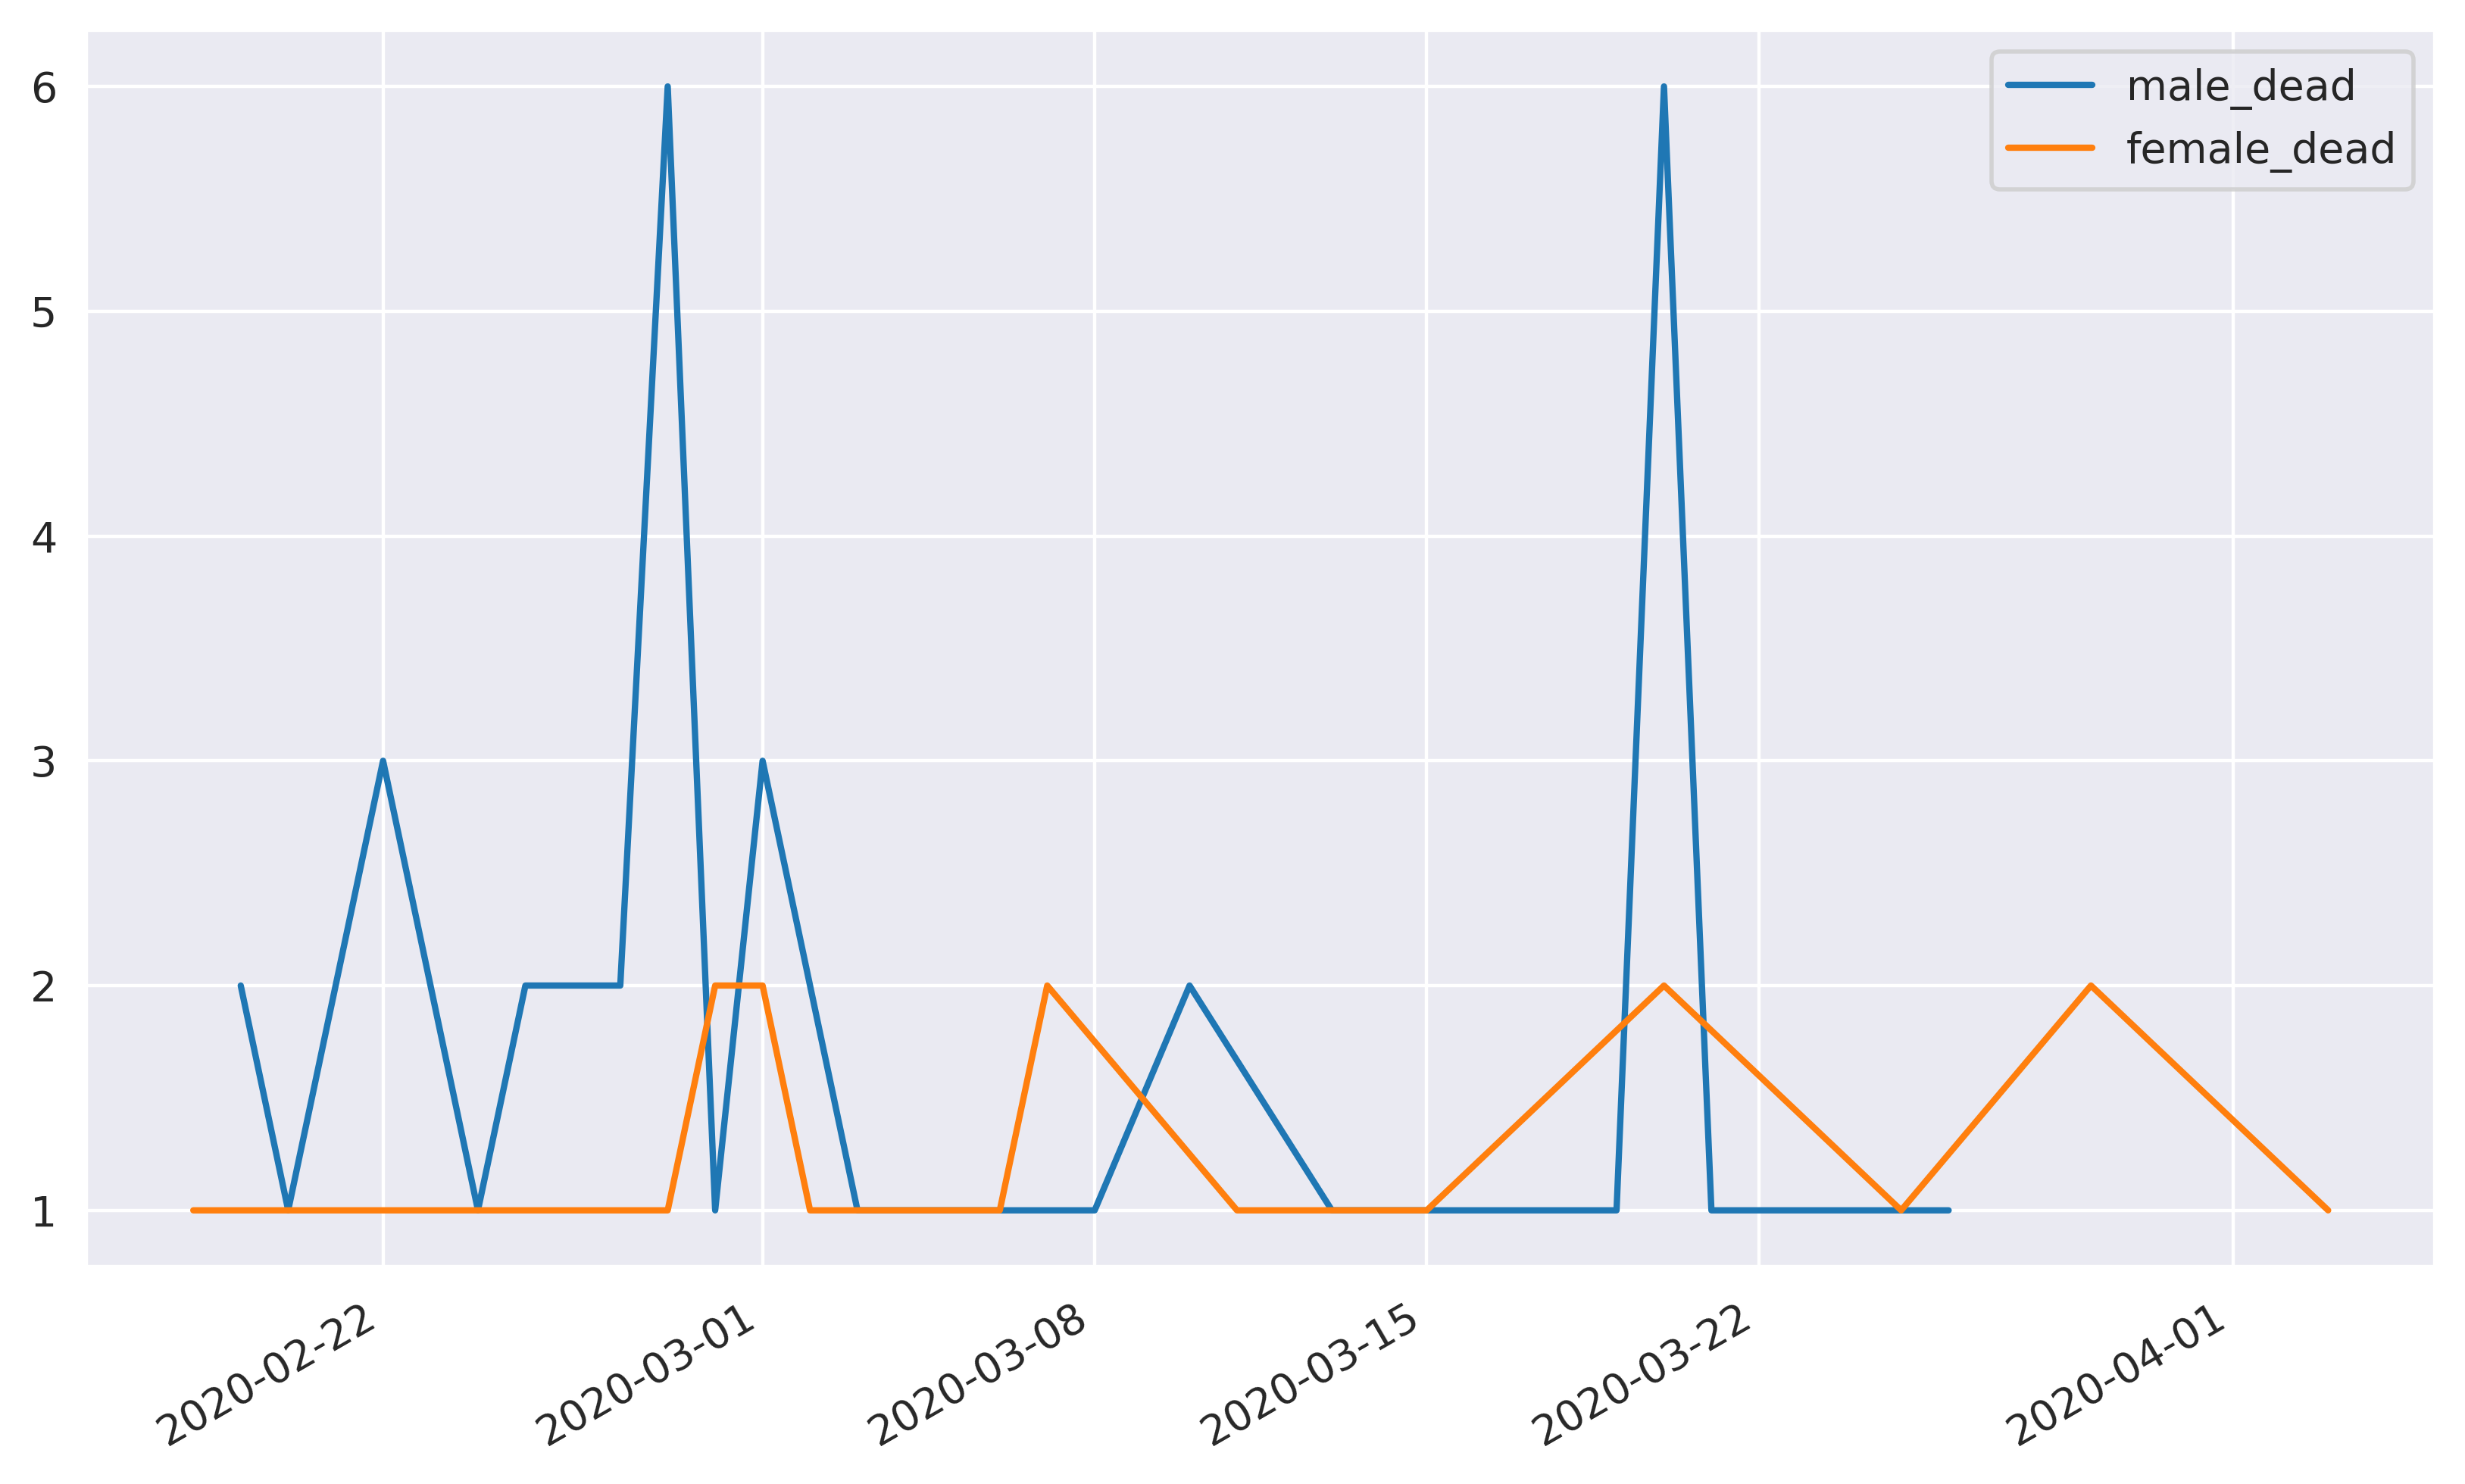

In [92]:
plt.figure(figsize=(10,6),dpi=200)
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()